<a name = "inicio"></a>
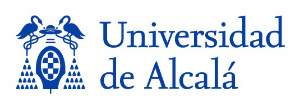

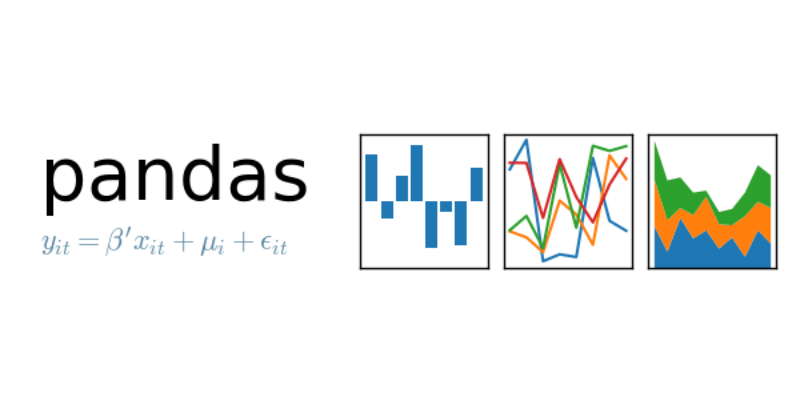

# Índice
1. [Presentación](#Presentación)
2. [Introducción a las estructuras de datos de pandas](#Introducción-a-las-estructuras-de-datos-de-pandas)
3. [Creación de series y dataframes](#Creación-de-series-y-dataframes)
4. [Inspección de series y dataframes](#Inspección-de-series-y-dataframes)
5. [Selección de datos](#Selección-de-datos)
6. [Edición de series y dataframes](#Edición-de-series-y-dataframes)
7. [Unión de series y dataframes](#Unión-de-series-y-dataframes)
8. [Operaciones con estructuras pandas](#Operaciones-con-estructuras-pandas)
9. [Reindexación](#Reindexación)
10. [Ordenación y clasificación](#Ordenación-y-clasificación)
11. [Aplicación de funciones y mapeado](#Aplicación-de-funciones-y-mapeado)
12. [Gestión de valores nulos](#Gestión-de-valores-nulos)
13. [Agrupaciones](#Agrupaciones)
14. [Lectura y escritura de ficheros](#Lectura-y-escritura-de-ficheros)

# Presentación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

La librería pandas (nombre derivado de **panel data**, término usado para referirse a conjuntos de datos estructurados multidimensionales) proporciona estructuras de datos y funciones de alto nivel que nos permiten trabajar con datos estructurados de manera muy cómoda. Estas estructuras y funciones son, normalmente, de las más usadas en análisis de datos.

Los principales objetos ofrecidos por pandas son el **dataframe**, estructura tabular bidimensional y la **serie**, ambas basadas en el array multidimensional de NumPy. Aun cuando NumPy ofrece una muy conveniente y eficiente estructura para el almacenamiento de datos, el ndarray, éste presenta importantes limitaciones cuando, durante un análisis, se hace necesaria más flexibilidad a la hora de aplicar etiquetas a nuestros datos, gestionar valores inexistentes, realizar agrupaciones por etiquetas, etc., limitaciones que son resueltas por las estructuras de más alto nivel ofrecidas por pandas.

La documentación oficial está disponible en el sitio web oficial de pandas:

https://pandas.pydata.org/

Esta librería se importa habitualmente con el alias **pd**:

In [1]:
import pandas as pd

Importamos también NumPy, Matplotlib y Seaborn...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Y fijamos el estilo gráfico de Seaborn por defecto:

In [3]:
sns.set()

Como se ha comentado, pandas se basa en la funcionalidad de NumPy, por lo que numerosas funciones de esta última librería son perfectamente aplicables a las series y a los dataframes.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Importa la librería pandas y comprueba su versión</div>
</div>

# Introducción a las estructuras de datos de pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Comencemos revisando las características básicas y algunos de los atributos de las series y los dataframes.

### Introducción a las series

Las series son estructuras unidimensionales conteniendo un array de datos (de cualquier tipo soportado por NumPy) y un array de etiquetas que van asociadas a los datos, llamado *índice* (**index** en la literatura en inglés). Podemos crer una serie sin especificar el índice:

In [4]:
s = pd.Series([2, 4, 6])
s

0    2
1    4
2    6
dtype: int64

En este caso, el índice está formado por números enteros consecutivos a partir del cero, como puede verse en la columna situada a la izquierda del resultado anterior.

También se puede indicar explícitamente con el parámetro **index**:

In [5]:
s = pd.Series([15, 12, 21], index = ["Ene", "Feb", "Mar"])
s

Ene    15
Feb    12
Mar    21
dtype: int64

El índice implícito (basado en números enteros) siempre existe.

Los elementos de la serie pueden extraerse con el nombre de la serie y, entre corchetes, el índice (posición) del elemento:

In [6]:
s[0]

15

O mediante su índice explícito (etiqueta):

In [7]:
s["Ene"]

15

Las etiquetas que forman el índice no necesitan ser diferentes. Pueden ser de cualquier tipo (numérico, textos, tuplas...) siempre que sea posible aplicar la función **hash** sobre ellas.

Es de destacar que el lazo entre una etiqueta y un valor se mantendrá salvo que lo modifiquemos explícitamente. Esto quiere decir que filtrar una serie o eliminar un elemento de la serie, por ejemplo, no va a modificar las etiquetas asignadas a cada valor.

Otro comentario importante es al respecto de la inmutabilidad del índice de etiquetas: aun cuando es posible asignar a una serie un nuevo conjunto de etiquetas a través del atributo **index**, intentar modificar un único valor del index va a devolver un error.

Al igual que ocurre con el array NumPy, una serie pandas solo puede contener datos de un mismo tipo.

In [8]:
s

Ene    15
Feb    12
Mar    21
dtype: int64

En el resultado anterior puede apreciarse el índice a la izquierda ("Ene", "Feb" y "Mar") y los datos a la derecha (15, 12 y 21). El tipo de la serie, accesible a través del atributo **dtype** (que en se muestra en la parte inferior: *int64*), coincide con el tipo de los datos que contiene:

In [9]:
s.dtype

dtype('int64')

Podemos acceder a los objetos que contienen los índices y los valores a través de los atributos **index** y **values** de la serie, respectivamente:

In [10]:
s.index

Index(['Ene', 'Feb', 'Mar'], dtype='object')

Vemos que el índice (formado por cadenas de texto) es de tipo "objeto"

In [11]:
s.values

array([15, 12, 21], dtype=int64)

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Comprueba el tipo devuelto por el atributo values de la siguiente serie:</div>
    s = pd.Series([15, 12, 21], index = ["Ene", "Feb", "Mar"])
</div>

La serie tiene, además, un atributo **name**, atributo que también encontramos en el índice. Este atributo, por defecto, está vacío:

In [12]:
s.name

In [13]:
s.index.name

Una vez los hemos fijado, se muestran junto con la estructura al imprimir la serie:

In [14]:
s

Ene    15
Feb    12
Mar    21
dtype: int64

Fijemos un nombre para la serie:

In [15]:
s.name = "Ventas 2018"
s.name

'Ventas 2018'

In [16]:
s

Ene    15
Feb    12
Mar    21
Name: Ventas 2018, dtype: int64

Si asignamos un nombre al índice, también se muestra al imprimir la serie:

In [17]:
s.index.name = "Meses"
s

Meses
Ene    15
Feb    12
Mar    21
Name: Ventas 2018, dtype: int64

El atributo **axes** nos da acceso "a los ejes" (a los índices), aunque en este caso solo hay uno.

In [18]:
s.axes

[Index(['Ene', 'Feb', 'Mar'], dtype='object', name='Meses')]

El atributo **shape** nos devuelve el tamaño de la serie:

In [19]:
s.shape

(3,)

### Introducción a los DataFrames

Los dataframes son estructuras bidimensionales, que contienen datos que pueden tener asociados etiquetas en filas y en columnas. Pueden crearse de múltiples formas. Por ejemplo, a partir de un diccionario, en cuyo caso las claves son interpretadas como las cabeceras de las columnas:

In [20]:
d = {
    "Compras": [41, 32, 56, 18],
    "Ventas": [17, 54, 6, 78]
}

In [21]:
df = pd.DataFrame(d, index = ["ene", "feb", "mar", "abr"])
df

,Compras,Ventas
ene,41,17
feb,32,54
mar,56,6
abr,18,78


Aunque veremos con detalle en una sección posterior cómo crear dataframes, puede apreciarse en la imagen anterior que hemos pasado al constructor **pd.DataFrame** un diccionario y una lista: las claves del diccionario serán los nombres de las columnas, sus valores, los valores de las columnas, y los valores de la lista se convertirán las etiquetas de filas.

Cada columna de un dataframe es una serie pandas. Aunque lo veremos más adelante, podemos extraer una columna de un dataframe de la siguiente forma:

In [22]:
df["Compras"]

ene    41
feb    32
mar    56
abr    18
Name: Compras, dtype: int64

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Comprueba el tipo de alguna columna del dataframe anterior</div>
</div>

Si indicamos el índice de filas de forma explícita, se muestra al imprimir el dataframe:

In [23]:
d = {
    "Compras": [41, 32, 56, 18],
    "Ventas": [17, 54, 6, 78]
}

df = pd.DataFrame(d, index = ["Ene", "Feb", "Mar", "Abr"])
df

,Compras,Ventas
Ene,41,17
Feb,32,54
Mar,56,6
Abr,18,78


Normalmente crearemos el dataframe de una vez, sin declarar el diccionario por adelantado:

In [24]:
df = pd.DataFrame({
    "Compras": [41, 32, 56, 18],
    "Ventas": [17, 54, 6, 78]
    },
    index = ["Ene", "Feb", "Mar", "Abr"]
)
df

,Compras,Ventas
Ene,41,17
Feb,32,54
Mar,56,6
Abr,18,78


Cada columna puede tener un tipo diferente (aunque éste deberá ser el mismo para todos los elementos de una columna concreta). Podemos acceder a los tipos de las columnas con el atributo **dtypes**:

In [25]:
df.dtypes

Compras    int64
Ventas     int64
dtype: object

Accedemos al índice de filas con el atributo **index**:

In [26]:
df.index

Index(['Ene', 'Feb', 'Mar', 'Abr'], dtype='object')

Y al de ventas con **columns**:

In [27]:
df.columns

Index(['Compras', 'Ventas'], dtype='object')

El atributo **axes** nos da acceso a los ejes (índices) que, en este caso, son dos:

In [28]:
df.axes

[Index(['Ene', 'Feb', 'Mar', 'Abr'], dtype='object'),
 Index(['Compras', 'Ventas'], dtype='object')]

Y también podemos dar nombre a los índices:

In [29]:
df.index.name = "Meses"
df.columns.name = "Métricas"
df

Métricas,Compras,Ventas
Meses,,
Ene,41,17
Feb,32,54
Mar,56,6
Abr,18,78


<div style="background:#ffffcc;padding:20px;color:#000000">
<p>La nomenclatura usada por pandas puede resultar un tanto confusa en lo que se refiere a los índices: tanto la estructura que contiene las etiquetas de filas como la que contiene las etiquetas de columnas son objetos de tipo *pandas.core.indexes.base.Index* ("índice", en español):</p>
</div>

In [30]:
type(df.index)

pandas.core.indexes.base.Index

In [31]:
type(df.columns)

pandas.core.indexes.base.Index

<div style="background:#ffffcc;padding:20px;color:#000000">
<p>...pero, como se ha comentado, el índice de filas se denomina también <strong>index</strong> (aunque en minúsculas), y el de columna, **columns**.</p>

<p>Además, el nombre de "indice" se aplica normalmente a la referencia de un dato en una estructura según su posición. Por ejemplo, en la lista m = ["a", "b"], el índice del primer elemento es el número o valor que, añadido entre corchetes tras el nombre de la lista, nos permite acceder al elemento. Así, el índice del elemento "a" en la lista mencionada es 0, y el índice del elemento "b" es 1, lo que no es del todo coherente con el concepto de "índice" de una estructura pandas cuando lo especificamos explícitamente.</p>

<p>Para evitar esta confusión, a lo largo de esta documentación hablaremos normalmente de "<i>índices</i>" (en plural) para referirnos a estas dos estructuras (de filas y columnas), de "<i>índice</i>" (en singular) para referirnos al índice de etiquetas del eje vertical, y de "<i>índice de columnas</i>" y de "<i>índice de filas</i>" siempre que sea necesario remarcar a cuál estamos refiriéndonos.</p>
</div>

Al igual que con las series, el atributo **values** nos devuelve los valores:

In [32]:
df.values

array([[41, 17],
       [32, 54],
       [56,  6],
       [18, 78]], dtype=int64)

Y el atributo **shape** nos devuelve las dimensiones:

In [33]:
df.shape

(4, 2)

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>¿De qué tipo es el resultado devuelto por el atributo values aplicado al array anterior? ¿Cuál es su tamaño?</div>
</div>

# Creación de series y dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Hay dos constructores principales para la creación de series y dataframes: **pd.Series** y **pd.DataFrames**, respectivamente. Estos constructores permiten crear estas estructuras a partir de diferentes tipos de variables: diccionarios, listas... También permiten personalizar las etiquetas de los índices, y filtrar y reordenar las etiquetas de columnas. Veamos los métodos principales.

### Creación de series

El constructor para la creación de una serie pandas es [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). Este constructor tiene tres parámetros principales:

* **data**: estructura de datos tipo array, iterable, diccionario o valor escalar que contendrá los valores a introducir en la serie.
* **index**: estructura tipo array con la misma longitud que los datos. Si este argumento no se añade al crear la serie, se agregará un índice por defecto formado por números enteros desde 0 hasta n-1, siendo n el número de datos.
* **dtype**: tipo de datos para la serie. Si no se especifica, se inferirá a partir de los datos.

Los valores del índice, como ya se ha comentado anteriormente, no tienen que ser necesariamente distintos aunque ciertas operaciones pueden generar un error si no soportan la posibilidad de tener índices duplicados.

###### Creación de una serie a partir de una lista o de un array NumPy

En el siguiente ejemplo, estamos creando una serie simplemente a partir de una lista:

In [34]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

Al no haberse especificado un índice, se asigna uno automáticamente con los valores 0, 1 y 2.

Si repetimos esta instrucción especificando un índice:

In [35]:
s = pd.Series([7, 5, 3], index = ["Ene", "Feb", "Mar"])
s

Ene    7
Feb    5
Mar    3
dtype: int64

...vemos cómo el índice por defecto ha sido sustituido por el indicado. En este caso, la longitud del índice deberá coindicir con el número de elementos de la lista.

Los mismos comentarios podrían hacerse si, en lugar de una lista, hubiésemos partido de un array NumPy para crear la serie.

###### Creación de una serie a partir de un diccionario

Si partimos de un diccionario para crear la serie:

In [36]:
d = {"Ene":7, "Feb":5, "Mar":3}
s = pd.Series(d)
s

Ene    7
Feb    5
Mar    3
dtype: int64

...vemos cómo el constructor utiliza las claves como etiquetas del índice, y los valores del diccionario como valores de la serie.

Si incluimos el índice explícitamente en el constructor, los valores en la serie se tomarán en el orden en el que estén en el índice explícito. Además, si en éste hay valores que no pertenecen al conjunto de claves del diccionario, se añaden a la serie con un valor NaN:

In [37]:
d = {"Ene":7, "Feb":5, "Mar":3}
s = pd.Series(d, index = ["Abr", "Mar", "Feb", "Ene"])
s

Abr    NaN
Mar    3.0
Feb    5.0
Ene    7.0
dtype: float64

En este ejemplo, hemos creado la serie especificando el índice que hemos formado dando la vuelta a las claves del diccionario ("Mar", "Feb" y "Ene") y hemos añadido a la lista de etiquetas el valor "Abr", que no pertenece al conjunto de claves del diccionario. Se ha añadido a la serie, pero se le ha asignado el valor *NaN*. Es precisamente la presencia de este valor lo que modifica el tipo de la serie a float.

###### Creación de una serie a partir de un escalar

Si los datos se reducen a un escalar (no a una lista con un único elemento, sino a un sencillo escalar como 7 o 15.4) será necesario añadir el índice explícitamente. El número de elementos de la serie coincidirá con el número de elementos del índice, y el escalar será asignado como valor a todos ellos:

In [38]:
s = pd.Series(7, index = ["Ene", "Feb", "Mar"])
s

Ene    7
Feb    7
Mar    7
dtype: int64

### Creación de dataframes

El constructor de dataframes es [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Acepta cuatro parámetros principales:

* **data**: estructura de datos ndarray (array NumPy), diccionario u otro dataframe
* **index**: índice a aplicar a las filas. Si no se especifica, se asignará uno por defecto formado por números enteros entre 0 y n-1, siendo n el número de filas del dataframe.
* **columns**: etiquetas a aplicar a las columnas. Al igual que ocurre con el índice de filas, si no se añade se asignará uno automático formado por números enteros entre 0 y n-1, siendo n el número de columnas.
* **dtype**: tipo a aplicar a los datos. Solo se permite uno. Si no se especifica, se infiere el tipo de cada columna a partir de los datos que contengan.

Los valores de los índices de filas y columnas no tienen por qué ser necesariamente distintos.

Veamos algunas de las estructuras a partir de las que es posible construir un dataframe:

###### Creación de un dataframe a partir de un diccionario de listas

En este escenario partimos del siguiente diccionario de listas de valores:

In [39]:
d = {"A": [1, 2], "B": [3, 4]}
d

{'A': [1, 2], 'B': [3, 4]}

Y creamos el dataframe con él como primer argumento:

In [40]:
df = pd.DataFrame(d)
df

,A,B
0,1,3
1,2,4


El dataframe se ha creado situando las claves del diccionario como etiquetas de columnas y las listas asociadas a cada clave como columnas del dataframe. Al no haber especificado un índice de filas, éste ha tomado valores por defecto (0 y 1).

A continuación repetimos la misma operación especificando las etiquetas tanto para filas como para columnas, utilizando los parámetros **index** y **columns**, respectivamente:

In [41]:
df = pd.DataFrame(d, index = ["Ene", "Feb"], columns = ["B", "A"])
df

,B,A
Ene,3,1
Feb,4,2


Recordemos que con el parámetro columns podemos especificar el orden en el que se mostrarán las columnas o incluso filtrar éstas (no incluyendo todas las etiquetas presentes en el diccionario como claves), pero no cambiar sus nombres. De hecho, ya se ha comentado que si alguna de las etiquetas incluidas en dicho argumento no apareciese en el conjunto de claves del diccionario, se crearía una columna con dicho nombre pero con todos sus valores fijados a *NaN*.

Si, en lugar de listas de datos como valores del diccionario, hubiesen sido arrays NumPy o series, el procedimiento habría sido exactamente el mismo.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Crea un dataframe en el que se muestren por filas los símbolos de elementos químicos (Hidrógeno, Helio y Litio) y en columnas el nombre del elemento y su número atómico</div>
</div>

###### Creación de un dataframe a partir de un array NumPy

En el caso de partir de un array NumPy, si no se especifican las etiquetas de filas y columnas, se asignan las etiquetas por defecto:

In [42]:
datos = np.arange(12).reshape(3, 4)
datos

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
df = pd.DataFrame(datos)
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


O, de una sola vez:

In [44]:
df = pd.DataFrame(np.arange(12).reshape(3, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


Las filas del array NumPy siguen siendo interpretadas como filas del dataframe.

Si especificamos las etiquetas de filas y columnas, el resultado es diferente:

In [45]:
df = pd.DataFrame(datos, index = ["Ene", "Feb", "Mar"], columns = ["A", "B", "C", "D"])
df

,A,B,C,D
Ene,0,1,2,3
Feb,4,5,6,7
Mar,8,9,10,11


###### Creación de un dataframe a partir de una lista de diccionarios

También podemos partir de un conjunto de diccionarios, cada uno definiendo el contenido de lo que será una fila del dataframe:

In [46]:
m = [
    {"A":1, "B": 2},
    {"A":3, "B": 3}
]
m

[{'A': 1, 'B': 2}, {'A': 3, 'B': 3}]

In [47]:
pd.DataFrame(m)

,A,B
0,1,2
1,3,3


Los diccionarios deberán compartir el mismo conjunto de claves que se interpretarán como etiquetas de columnas. Si las etiquetas no coinciden, se crearán todas las columnas pero se asignarán NaN a los valores desconocidos:

In [48]:
m = [
    {"A":1, "B": 2},
    {"A":3, "B": 3},
    {"A":4, "C": 5}
]
m

[{'A': 1, 'B': 2}, {'A': 3, 'B': 3}, {'A': 4, 'C': 5}]

In [49]:
pd.DataFrame(m)

,A,B,C
0,1,2.0,NaN
1,3,3.0,NaN
2,4,NaN,5.0


###### Otros métodos

Además de poder partir de otras estructura además de las vistas (de un diccionario de tuplas, por ejemplo), hay dos constructores adicionales: [pandas.DataFrame.from_dict](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html), que crea un dataframe a partir de un diccionario de diccionarios o de secuencias tipo array, y [pandas.DataFrame.from_records](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_records.html), que parte de una lista de tuplas o de arrays NumPy con un tipo estructurado.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Crea un dataframe ("Ventas") a partir de un array NumPY de números enteros aleatorios entre 0 y 20 -ambos incluidos- de dimensiones 6x5.</div>
<div>Aplica a las filas un índice que represente el mes de enero a junio (usa solo tres letras minúsculas por mes)</div>
<div>Aplica a las columnas las etiquetas de la "A" a la "E".</div>
</div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Usa el siguiente código para cargar un dataframe proveído por la librería Seaborn y contesta las siguientes preguntas:</div>
<div>tips = sns.load_dataset("tips")</div>
<ul>
    <li>¿Puedes confirmar el tipo?</li>
    <li>¿Cuáles son sus dimensiones?</li>
    <li>Imprime el índice de filas</li>
    <li>Imprime el índice de columnas</li>
</ul>
</div>

# Inspección de series y dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Normalmente, una vez hemos cargado un bloque de datos en una serie o un dataframe, lo primero que haremos será inspeccionarlo para confirmar que los datos cargados son los esperados y que la lectura se ha realizado correctamente. Para esto tenemos los métodos **head**, **tail** y **sample**, con un comportamiento semejante en series y dataframes, que nos muestran un subconjunto de los datos cargados. Además, los métodos **describe** e **info** nos proporcionan información adicional sobre los datos. Veamos estos métodos por separado.

Utilicemos el dataframe tips comentado en el ejercicio anterior:

In [50]:
tips = sns.load_dataset("tips")

## Los métodos head, tail y sample
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

###### El método head

Este método, [pandas.Series.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.head.html) para series y [pandas.DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) para dataframes, devuelve los primeros elementos de la estructura (los primeros valores en el caso de una serie y las primeras filas en el caso de un dataframe). Por defecto, se trata de los 5 primeros elementos, pero podemos especificar el número que deseamos como argumento de la función.

In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Si se especifica un número como argumento, se muestra ese número de filas:

In [52]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


Aplicado a una serie tiene la misma funcionalidad:

In [53]:
tips["size"].head()

0    2
1    3
2    3
3    2
4    4
Name: size, dtype: int64

###### El método tail

Los métodos [pandas.Series.tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tail.html) (para series) y [pandas.DataFrame.tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) (para dataframes) son semejantes a los anteriores, pero muestran los últimos elementos de la estructura. Si no indicamos otra cosa como argumento, serán los 5 últimos elementos los que se muestren:

In [54]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


También podemos especificar el número de registros a mostrar:

In [55]:
tips.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Semejante comportamiento tiene el método de las series:

In [56]:
tips["size"].tail()

239    3
240    2
241    2
242    2
243    2
Name: size, dtype: int64

###### El método sample

Sin embargo, es frecuente que los datos que hayamos leído estén ordenados según algún criterio, y que el bloque de datos mostrado por los métodos **head** o **tail** estén formados por datos muy parecidos. Y en ocasiones nos puede convenir ver datos aleatorios de nuestra estructura. Para esto podemos utilizar los métodos [pandas.Series.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sample.html) para series y [pandas.DataFrame.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) para dataframes:

In [57]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
184,40.55,3.0,Male,Yes,Sun,Dinner,2


Al contrario que los métodos *head* o *tail*, el número de elementos devueltos por defecto es uno, por lo que, si deseamos extraer una muestra mayor, tendremos que indicarlo como primer argumento:

In [58]:
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
126,8.52,1.48,Male,No,Thur,Lunch,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3
116,29.93,5.07,Male,No,Sun,Dinner,4


Si lo aplicamos a una serie:

In [59]:
tips["size"].sample(3)

4      4
120    2
92     2
Name: size, dtype: int64

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Utilizando el siguiente código que carga el dataframe conteniendo información sobre los pasajeros del Titanic:</div>
<div>titanic = sns.load_dataset("titanic")</div>
<div>...responde las siguientes preguntas</div>
<ul>
    <li>Muestra los 3 primeros registros</li>
    <li>¿De cuántos pasajeros tenemos información?</li>
	<li>Para cada pasajero ¿cuántos datos hay en el dataframe? (sin contarlos a mano)</li>
</ul>
</div>

## El método describe

El método [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) devuelve información estadística de los datos del dataframe o de la serie (de hecho, este método devuelve un dataframe). Esta información incluye el número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%.

Siguiendo con el ejemplo visto en la sección anterior:

In [60]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


El método acepta el parámetro **percentiles** conteniendo una lista (o semejante) de los percentiles a mostrar. También acepta los parámetros **include** y **exclude** para especificar los tipos de las características a incluir o excluir del resultado.

El método [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html) equivalente de una serie devuelve información semejante pero solo de la serie en cuestión:

In [61]:
tips["size"].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

## El método info

El método [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) muestra un resumen de un dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada:

In [62]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


Solo los dataframes tienen implementado este método.

## El método value_counts

Un método de las series pandas extremadamente útil es [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). Este método devuelve una estructura conteniendo los valores presentes en la serie y el número de ocurrencias de cada uno. Estos valores se muestran en orden decreciente:

In [63]:
tips["size"].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

Como puede apreciarse en las siguientes celdas, por defecto no se incluyen los valores nulos:

In [64]:
titanic = sns.load_dataset("titanic")

In [65]:
titanic["deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

Este comportamiento puede modificarse haciendo uso del parámetro **dropna**:

In [66]:
titanic["deck"].value_counts(dropna = False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

Si se trata de una serie numérica, en lugar de devolver los valores distintos y el número de ocurrencias, este método también puede agrupar los datos en "*bins*" y devolver una lista de bins (indicando sus márgenes) con el número de valores en cada uno de ellos. Por ejemplo, si quisiéramos agrupar los valores de la serie anterior en dos bins podríamos hacerlo de la siguiente forma:

In [67]:
tips.total_bill.value_counts(bins = 5)

(12.618, 22.166]    119
(22.166, 31.714]     50
(3.021, 12.618]      49
(31.714, 41.262]     19
(41.262, 50.81]       7
Name: total_bill, dtype: int64

# Selección de datos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Un aspecto relativamente complejo involucrado en el uso de las series y los dataframes -principalmente con esta última estructura- es la extracción o selección de datos. Esta relativa complejidad viene derivada principalmente de la abundancia de alternativas y de las excepciones a la norma que algunas de ellas aparentan ser.

### Selección de datos en series
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Ya se ha comentado que una serie pandas consta de un array de datos y un array de etiquetas (el índice o index). Si al crear la serie no se ha especificado el índice, ya sabemos que se asignará uno implícito por defecto:

In [68]:
s = pd.Series([10, 20, 30, 40])
s

0    10
1    20
2    30
3    40
dtype: int64

Podemos seleccionar los valores haciendo referencia al índice asignado con la misma notación que en un diccionario (la llamada "*notación corchetes*" o "*square bracket notation*"):

In [69]:
print(s[0])
print(s[2])

10
30


Usando esta sintaxis, si no se ha especificado un índice explícito, los índices negativos no están permitidos.

Si se asignan índices de forma explícita:

In [70]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

...podemos seleccionar los elementos usando el índice explícito o el implícito:

In [71]:
print(s[0])
print(s[2])

10
30


In [72]:
print(s["a"])
print(s["c"])

10
30


In [73]:
print(s["d"], s[3])

40 40


Con esta sintaxis, sí está permitido hacer uso de índices negativos para referirnos a los elementos desde el final de la estructura:

In [74]:
s[-1]

40

Si los índices asignados son números enteros (al igual que las etiquetas del índice implícito), el índice implícito queda desactivado:

In [75]:
s = pd.Series([2, 3, 4, 5], index = [3, 2, 1, 0])
s

3    2
2    3
1    4
0    5
dtype: int64

In [76]:
s[2]

3

...es cuyo caso no es posible usar índices negativos:

In [77]:
try:
    s[-1]
except:
    print("Error")

Error


### Uso de rangos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Siguiendo con esta la notación tipo diccionario, es posible seleccionar rangos de valores. De esta forma, si usamos un rango numérico en una serie en la que hemos definido un índice explícito:

In [78]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [79]:
s[1:3]

b    20
c    30
dtype: int64

...observamos que el rango se interpreta como haciendo referencia al índice implícito, y se incluyen los valores desde el primer índice incluido, hasta el último sin incluir.

Si no se incluye alguno de los límites, el comportamiento es el estándar en Python (si no se incluye el primer valor, se consideran todos los elementos desde el principio, y si no se incluye el último valor, se consideran todos los elementos hasta el final):

In [80]:
s[:3]

a    10
b    20
c    30
dtype: int64

In [81]:
s[1:]

b    20
c    30
d    40
dtype: int64

Si se utilizan los índices explícitos en el rango, el comportamiento es ligeramente diferente:

In [82]:
s["a":"c"]

a    10
b    20
c    30
dtype: int64

Vemos cómo se incluyen los valores desde el primer índice hasta el último índice, ambos incluidos.

Aquí también podemos obviar el uso de alguno de los dos límites:

In [83]:
s[:"c"]

a    10
b    20
c    30
dtype: int64

In [84]:
s["b":]

b    20
c    30
d    40
dtype: int64

Una posible fuente de confusión viene derivada del hecho de que, usando rangos, es posible hacer referencia tanto a las etiquetas como a los índices numéricos: si utilizamos etiquetas, hacemos referencia a las etiquetas (por supuesto):

In [85]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])

In [86]:
s["b":"c"]

b    20
c    30
dtype: int64

...y, por tanto, si utilizamos números, hacemos referencia a los índices numéricos (¿por supuesto...?):

¿Y qué ocurre si nuestras etiquetas son números? Pues que siempre que usemos rangos con números estaremos haciendo referencia a los índices numéricos: no es posible hacer referencia a las etiquetas:

In [87]:
s = pd.Series([1, 2, 3, 4], index = [3, 2, 1, 0])
s

3    1
2    2
1    3
0    4
dtype: int64

In [88]:
s[1:3]

2    2
1    3
dtype: int64

Sin embargo, algo como:

In [89]:
s[1]

3

...devolverá el valor cuya etiqueta es 1 (si existe):

...o el valor cuya posición es 1 si dicha etiqueta no existe y el índice explícito no es numérico:

In [90]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s[1]

20

Es debido a esto que existen los métodos **loc** e **iloc** que veremos poco más adelante. Dichos métodos hacen una referencia explícita a etiquetas o posiciones, respectivamente, eliminando cualquier duda al respecto de su interpretación.

### Uso de listas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Al igual que con los array NumPy, es posible indicar, no un elemento simple ni un rango, sino una lista de valores. Por ejemplo:

In [91]:
s

a    10
b    20
c    30
d    40
dtype: int64

In [92]:
s[[3, 1]]

d    40
b    20
dtype: int64

En este ejemplo, la lista contiene los números 3 y 1, y son los valores correspondientes a estos índices -y en el orden especificado- los devueltos por la instrucción.

El resultado devuelto sigue siendo una serie pandas:

In [93]:
type(s[[3, 1]])

pandas.core.series.Series

Con esta notación, en el caso de que la serie tenga un índice explícito numérico, los valores de la lista se interpretan como haciendo referencia al índice explícito.

### El método get
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método [get](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.get.html) devuelve el valor que ocupa el índice indicado "de forma segura". Es decir, no devuelve un error en el caso de que el elemento en cuestión no exista. Por el contrario, devuelve un valor nulo (se puede personalizar este resultado).

In [94]:
s

a    10
b    20
c    30
d    40
dtype: int64

In [95]:
s.get(2)

30

Si intentamos acceder al elemento cuyo índice es 7...

In [96]:
s.get(7)

Obsérvese el tipo del resultado en este caso:

In [97]:
type(s.get(7))

NoneType

### El método loc
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

La selección en una serie (o en un dataframe) pandas no es tan evidente como lo era con los arrays NumPy, pues en algo como s[3] no queda claro si el 3 es un índice o una etiqueta. Por este motivo existen métodos que cubren ambas situaciones y evitan toda tipo de ambigüedad.

El método [pandas.Series.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html) permite seleccionar un grupo de elementos por etiquetas.

###### Uso con etiqueta simple

Como argumento de este método puede utilizarse una única etiqueta:

In [98]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [99]:
s.loc["b"]

20

En este caso el argumento se interpreta siempre como etiqueta del índice, nunca como posición en dicho índice aun cuando se pase un número entero que no pertenece al conjunto de etiquetas y pueda representar una posición válida:

In [100]:
try:
    s.loc[0]
except:
    print("Error")

Error


###### Uso con una lista de etiquetas

También podemos pasar al método una lista de etiquetas, en cuyo caso se extraen los valores correspondientes a dichas etiquetas y en el orden en el que se incluyen en la lista:

In [101]:
s.loc[["d", "a"]]

d    40
a    10
dtype: int64

###### Uso con rangos

Otra opción es pasar al método un rango:

In [102]:
s["b":"d"]

b    20
c    30
d    40
dtype: int64

En este caso es importante recalcar que, tal y como se ve en la imagen anterior, el método va a devolver todos los elementos entre los límites indicados **ambos incluidos**.

### El método iloc
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método [pandas.Series.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iloc.html) permite extraer datos de la serie a partir de los índices implícitos que éstos tienen asignados.

###### Uso con un número entero

La opción más simple es utilizar como argumento un simple número entero (el primer elemento de la serie recibe el índice cero):

In [103]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

In [104]:
s.iloc[1]

20

In [105]:
s.iloc[0]

10

Si el número es negativo, hace referencia al final de la serie (en este caso, el último elemento recibe el índice -1) -y esto tanto si se ha especificado un índice explícito como si no-:

In [106]:
s.iloc[-1]

40

In [107]:
s.iloc[-4]

10

###### Uso con lista o array de números

Una segunda opción es pasar como argumento una lista o array de números, en cuyo caso se devuelven los elementos que ocupan dichas posiciones en el orden indicado en la lista o array:

In [108]:
s.iloc[[2, 0]]

c    30
a    10
dtype: int64

También podemos incluir en esta lista números negativos, con la funcionalidad ya comentada:

In [109]:
s.iloc[[-2, 0]]

c    30
a    10
dtype: int64

###### Uso con un rango de números

Una tercera opción es usar como argumento un rango de números:

In [110]:
s

a    10
b    20
c    30
d    40
dtype: int64

In [111]:
s.iloc[1:3]

b    20
c    30
dtype: int64

Como vemos, si el rango tiene la forma a:b, se incluyen todos los elementos desde aquel cuyo índice es **&#97;** (incluido) hasta el que tiene el índice **&#98;** (sin incluir).

Si no se especifica el primer valor, se consideran todos los elementos desde el principio de la serie:

In [112]:
s.iloc[:3]

a    10
b    20
c    30
dtype: int64

Y, si no se especifica el segundo valor, se consideran todos los elementos hasta el final de la serie:

In [113]:
s.iloc[2:]

c    30
d    40
dtype: int64

También pueden usarse valores negativos para indicar el comienzo y/o el final del rango:

In [114]:
s.iloc[1:-1]

b    20
c    30
dtype: int64

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Usando el dataframe titanic, responde a las siguientes preguntas:</div>
<div></div>
<div></div>
<ul>
    <li>¿Cuál es el género del primer pasajero de la lista?</li>
    <li>¿Cuánto pagaron los pasajeros cuyos índices son 99, 100 y 102?</li>
    <li>¿Donde embarcaron los últimos tres pasajeros?</li>
</ul>
</div>

### Uso de arrays booleanos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Una muy interesante opción para seleccionar elementos de una serie pandas es usar arrays booleanos. Por ejemplo, partimos de la siguiente serie:

In [115]:
s = pd.Series([5, 2, -3, 7, 8, 4])
s

0    5
1    2
2   -3
3    7
4    8
5    4
dtype: int64

Podemos seleccionar un conjunto de valores de la misma haciendo referencia al nombre de la serie y, entre los corchetes, una lista o array de booleanos (también puede ser una serie de booleanos, como veremos un poco más adelante):

In [116]:
s[[True, False, False, True, True, False]]

0    5
3    7
4    8
dtype: int64

En este caso hemos seleccionado los elementos cuyos índices son 0, 3 y 4, que son los índices que ocupan los booleanos *True* en la lista de booleanos usada (lista cuya longitud deberá ser igual a la longitud de la serie pues, de no ser así, se devuelve un error).

Esta lista o array de booleanos no tiene porqué ser especificada de forma explícita, puede ser el resultado de una expresión:

In [117]:
s > 2

0     True
1    False
2    False
3     True
4     True
5     True
dtype: bool

Aquí, hemos usado la expresión s > 2 para generar una serie pandas de booleanos, serie en la que los valores toman el valor *True* cuando el valor con el mismo índice de s toma un valor mayor estricto que 2.

Podemos entonces usar este resultado para extraer valores de la serie s (valores que serán aquellos mayores que 2):

In [118]:
s[s > 2]

0    5
3    7
4    8
5    4
dtype: int64

...obteniendo los valores de s que son mayores que 2.

Este mismo enfoque puede ser usado con los métodos **pandas.Series.loc** y **pandas.Series.iloc** ya vistos en las secciones anteriores con algún matiz adicional:

El método loc puede ser usado tanto con un array explícito de booleanos:

In [119]:
s.loc[[True, False, False, True, True, False]]

0    5
3    7
4    8
dtype: int64

...como con una expresión que genera, por ejemplo, una serie pandas de booleanos:

In [120]:
s.loc[s > 2]

0    5
3    7
4    8
5    4
dtype: int64

Sin embargo, el método iloc tiene un comportamiento ligeramente diferente. Puede ser usados con arrays explícitos de booleanos:

In [121]:
s.iloc[[True, False, False, True, True, False]]

0    5
3    7
4    8
dtype: int64

...pero el uso de expresiones que generen una serie pandas de booleanos devuelve un error:

In [122]:
try:
    s.iloc[s > 2]
except:
    print("Error")

Error


Si el objeto que está generando la estructura de booleanos (s, en s > 2) fuese un array NumPy en lugar de tratarse de una serie pandas, sí sería posible usar el método .iloc. De esta forma, la expresión s > 2 genera, como hemos visto, una serie pandas, pero podemos extraer los valores con el atributo **values**, que genera un array numpy:

In [123]:
s.iloc[(s > 2).values]

0    5
3    7
4    8
5    4
dtype: int64

Es por ello que Pandas recomienda usar siempre el método **loc** cuando trabajemos con selección basada en booleanos.

### Selección aleatoria
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

También podemos realizar una selección aleatoria a partir de una serie. El método [pandas.Series.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sample.html) permite especificar o bien el número de elementos a extraer o bien la fracción del número total de elementos a extraer (parámetros **&#120;** y **frac**, respectivamente), pudiendo especificar si la extracción se realiza con reemplazo o no (parámetro **replace**), los pesos a aplicar a cada elemento para realizar una extracción aleatoria ponderada (parámetro **weights**), y una semilla para el generador de números aleatorios que asegure la reproducibilidad de la extracción (parámetro **random_state**). Por ejemplo:

In [124]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])

In [125]:
s.sample(n = 3, random_state = 18)

d    40
b    20
a    10
dtype: int64

Hemos extraído 3 elementos, por defecto sin reemplazo, aplicando el valor 18 como semilla del generador de números aleatorios.

In [126]:
s.sample(frac = 0.6, random_state = 18)

d    40
b    20
dtype: int64

En este otro ejemplo hemos extraído el 60% de los valores de la serie original haciendo uso del parámetro **frac**.

Si no hay reemplazo, el número máximo de elementos que podemos extraer coincide con la longitud de la serie. Pero si la extracción la realizamos con reemplazo, podemos especificar cualquier número de elementos:

In [127]:
s.sample(10, random_state = 18, replace = True)

c    30
d    40
a    10
b    20
c    30
b    20
c    30
c    30
c    30
a    10
dtype: int64

### El método pop
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método [pandas.Series.pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pop.html) extrae y elimina un elemento de una serie cuyo índice se indica como argumento:

In [128]:
s = pd.Series([1, 2, 3, 4])
s.pop(1)

2

In [129]:
s

0    1
2    3
3    4
dtype: int64

...devolviendo un error en caso de que no exista:

In [130]:
s = pd.Series([1, 2, 3, 4])

In [131]:
try:
    s.pop(18)
except:
    print("Error")

Error


Si la serie tiene un índice explícito, el argumento de **pop** hará referencia a este índice:

In [132]:
s = pd.Series([10, 20, 30, 40], index = ["a", "b", "c", "d"])
s.pop("a")

10

...y no al implícito, lo que devolvería un error:

In [133]:
try:
    s.pop(0)
except:
    print("Error")

Error


### Selección de datos en dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Desde un punto de vista semántico, un dataframe puede ser considerado semejante a un diccionario de series, en el que las claves son los nombres de las columnas y los valores, las columnas (que son series pandas). En este ejemplo:

In [134]:
a = np.random.randint(0, 21, size = (6, 5))
columns = ["A", "B", "C", "D", "E"]
index = ["ene", "feb", "mar", "abr", "may", "jun"]
Ventas = pd.DataFrame(a, index = index, columns = columns)
Ventas

,A,B,C,D,E
ene,6,6,17,7,17
feb,7,1,6,2,1
mar,1,19,16,0,5
abr,16,18,9,1,16
may,0,20,8,3,6
jun,12,6,2,9,3


...podemos utilizar la sintaxis de los diccionarios para seleccionar la columna "B":

In [135]:
Ventas["B"]

ene     6
feb     1
mar    19
abr    18
may    20
jun     6
Name: B, dtype: int32

Esto significa que podemos realizar una selección en dicho resultado para, por ejemplo, extraer el valor correspondiente a febrero:

In [136]:
Ventas["B"]["feb"]

1

Sin embargo, la más que razonable opción de eliminar los corchetes que separan ambos índices y sustituirlos por una coma no funciona:

In [137]:
try:
    Ventas["B", "feb"]
except:
    print("Error")

Error


Si, una vez seleccionada una columna, le asignamos una lista o array (o serie) de valores de la misma longitud, estamos modificando dicha columna del dataframe:

In [138]:
Ventas["B"] = [-1, -2, -3, -4, -5, -6]
Ventas

,A,B,C,D,E
ene,6,-1,17,7,17
feb,7,-2,6,2,1
mar,1,-3,16,0,5
abr,16,-4,9,1,16
may,0,-5,8,3,6
jun,12,-6,2,9,3


Si asignamos un único valor escalar, este se propaga por toda la columna:

In [139]:
Ventas["C"] = 0
Ventas

,A,B,C,D,E
ene,6,-1,0,7,17
feb,7,-2,0,2,1
mar,1,-3,0,0,5
abr,16,-4,0,1,16
may,0,-5,0,3,6
jun,12,-6,0,9,3


Si estuviésemos asignando un array cuya longitud no coincidiese con la de la columna (y no estuviésemos asignando un escalar), obtendríamos un error.

Si asignamos a una columna una serie pandas se consideran los índices del dataframe y de la serie, haciendo coincidir los valores cuyos índices sean los mismos en ambas estructuras (si dicha columna no existe, se crea). En el caso de que haya valores en la serie con índices que no se encuentren en el dataframe, se descartan. Y en el caso de que haya índices en el dataframe que no se encuentren en la serie, se asigna un valor *NaN*.

Así, en el siguiente ejemplo, estamos asignando a la columna "D" una serie cuyos índices son "ene", "mar", "abr" y "jul". Es decir, la serie no tiene un valor para los índices "feb", "may" y "jun" que sí se encuentra en el dataframe (se asigna un NaN), e incluye el índice "jul" que no se encuentra en el dataframe y se descarta:

In [140]:
Ventas["D"] = pd.Series(
    [1, 2, 3, 4],
    index = ["ene", "mar", "abr", "jul"]
)
Ventas

,A,B,C,D,E
ene,6,-1,0,1.0,17
feb,7,-2,0,NaN,1
mar,1,-3,0,2.0,5
abr,16,-4,0,3.0,16
may,0,-5,0,NaN,6
jun,12,-6,0,NaN,3


Los valores asignados pueden proceder del propio dataframe:

In [141]:
Ventas["D"] = (2 * Ventas["A"]) / (2 - Ventas["E"])
Ventas

,A,B,C,D,E
ene,6,-1,0,-0.800000,17
feb,7,-2,0,14.000000,1
mar,1,-3,0,-0.666667,5
abr,16,-4,0,-2.285714,16
may,0,-5,0,-0.000000,6
jun,12,-6,0,-24.000000,3


También podemos acceder a una columna con la llamada "notación punto":

In [142]:
Ventas.A

ene     6
feb     7
mar     1
abr    16
may     0
jun    12
Name: A, dtype: int32

Deberemos tener en cuenta que con esta notación no es posible crear nuevas columnas ni eliminarlas con la función *del* y que solo funcionará si el nombre de la columna no incluye espacios en blanco y no coincide con ninguna palabra reservada de Python:

In [143]:
try:
    del(Ventas.A)
except:
    print("Error")

Error


...lo que sí puede hacerse con el operador selección:

In [144]:
try:
    del(Ventas["A"])
except:
    print("Error")

In [145]:
Ventas

,B,C,D,E
ene,-1,0,-0.800000,17
feb,-2,0,14.000000,1
mar,-3,0,-0.666667,5
abr,-4,0,-2.285714,16
may,-5,0,-0.000000,6
jun,-6,0,-24.000000,3


### Uso de rangos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El uso de un rango numérico entre los corchetes realiza una selección de filas, lo que puede parecer una cierta incoherencia:

In [146]:
a = np.random.randint(0, 21, size = (6, 5))
columns = ["A", "B", "C", "D", "E"]
index = ["ene", "feb", "mar", "abr", "may", "jun"]
Ventas = pd.DataFrame(a, index = index, columns = columns)
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


In [147]:
Ventas[2:4]

,A,B,C,D,E
mar,1,10,11,14,15
abr,1,9,6,14,1


El equipo de pandas lo justifica diciendo que esta sintaxis resulta extremadamente conveniente al tratarse de un tipo de selección frecuentemente usada. Esto es cierto, pero el hecho de que selecciones aparentemente semejantes (df[1,2], df[[1, 2]], df[1:3, 5], etc.) devuelvan un error no facilita su comprensión.

En todo caso, vemos en el resultado anterior que se devuelven las filas entre el primer valor del rango (incluido) y el último (sin incluir). También podríamos haber usado las etiquetas del índice:

In [148]:
Ventas["feb":"may"]

,A,B,C,D,E
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10


...aunque en este caso la selección incluye tanto la fila correspondiente a la primera etiqueta como la fila correspondiente a la segunda.

También podemos obviar la inclusión del primer o del segundo valor, considerándose las filas desde el comienzo/hasta el final del dataframe:

In [149]:
Ventas[:3]

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15


In [150]:
Ventas[3:]

,A,B,C,D,E
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


O haciendo uso de etiquetas:

In [151]:
Ventas["mar":]

,A,B,C,D,E
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


In [152]:
Ventas[:"may"]

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10


### Uso de listas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [153]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Si, al realizar la selección, situamos entre los corchetes una lista de etiquetas, estaremos seleccionando columnas en el orden en el que aparecen en la lista y con formato dataframe:

In [154]:
tips[["tip", "day"]].head()

,tip,day
0,1.01,Sun
1,1.66,Sun
2,3.50,Sun
3,3.31,Sun
4,3.61,Sun


El resultado es un dataframe:

In [155]:
print(type(tips[["tip", "day"]]))

<class 'pandas.core.frame.DataFrame'>


### El método get
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

También es posible extraer de forma segura una columna de un dataframe usando el método [pandas.DataFrame.get](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.get.html). Éste extrae la columna indicada devolviendo un valor alternativo (por defecto *None*) si dicha columna no existe:

In [156]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


In [157]:
Ventas.get("A")

ene    11
feb     1
mar     1
abr     1
may     1
jun     1
Name: A, dtype: int32

In [158]:
Ventas.get("H")

### El método loc
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Al igual que ocurre con las series, el método [pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) permite seleccionar un conjunto de filas y columnas por etiquetas. Este método acepta diferentes argumentos. Para probarlos, partamos del siguiente dataframe:

In [159]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


###### Uso con etiqueta simple

El primer escenario lo encontramos cuando usamos este método indicando una única etiqueta. En este caso estamos seleccionando la fila cuya etiqueta se indique:

In [160]:
Ventas.loc["may"]

A     1
B    11
C    18
D    20
E    10
Name: may, dtype: int32

El resultado es una serie pandas con las etiquetas de columnas del dataframe original como índice.

Es necesario mencionar que el argumento será siempre interpretado como etiqueta, aun cuando pueda estar representando un índice válido: 

In [161]:
df = Ventas.copy()
df.index = range(-2, 4)
df

,A,B,C,D,E
-2,11,9,15,14,18
-1,1,15,1,15,15
0,1,10,11,14,15
1,1,9,6,14,1
2,1,11,18,20,10
3,1,6,3,0,15


In [162]:
df.loc[0]

A     1
B    10
C    11
D    14
E    15
Name: 0, dtype: int32

Por supuesto, si dicha etiqueta no existe, se devuelve un error (nuevamente, aun cuando la etiqueta sea un número que pueda estar representando un índice válido.)

###### Uso con una lista de etiquetas

In [163]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


Si el argumento de un único valor y se trata de una lista, se devolverán las filas indicadas en el orden indicado:

In [164]:
Ventas.loc[["jun", "ene", "feb"]]

,A,B,C,D,E
jun,1,6,3,0,15
ene,11,9,15,14,18
feb,1,15,1,15,15


Al contrario de lo que ocurre cuando solo indicamos una etiqueta, el resultado es un dataframe. Y lo es aún cuando la lista contenga un único elemento:

In [165]:
Ventas.loc[["feb"]]

,A,B,C,D,E
feb,1,15,1,15,15


In [166]:
print(type(Ventas.loc[["feb"]]))

<class 'pandas.core.frame.DataFrame'>


###### Uso con rangos

Otra opción es utilizar rangos limitados por etiquetas. De esta forma, si continuamos con el mismo ejemplo:

In [167]:
Ventas.loc["feb":"abr"]

,A,B,C,D,E
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1


Obsérvese que la selección incluye todas las filas incluyendo las dos de los extremos del rango.

Obviamente el uso de índices (si no existen como etiquetas) devuelve un error:

In [168]:
try:
    Ventas.loc[0:2]
except:
    print("Error")

Error


###### Extracción de filas y columnas

En los ejemplos vistos hasta ahora estamos extrayendo una o varias filas para todas las columnas. En posible, por supuesto, especificar qué filas y qué columnas exactas queremos extraer. Así, si utilizamos una única etiqueta para indicar la fila y una única etiqueta para indicar la columna separadas por una coma, estaremos extrayendo un único valor:

In [169]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


In [170]:
Ventas.loc["may", "C"]

18

Podemos sustituir una de las dos etiquetas por el símbolo de dos puntos (:), lo que supondrá seleccionar todos los elementos de ese eje:

In [171]:
Ventas.loc[:, "A"]

ene    11
feb     1
mar     1
abr     1
may     1
jun     1
Name: A, dtype: int32

In [172]:
Ventas.loc["jun", :]

A     1
B     6
C     3
D     0
E    15
Name: jun, dtype: int32

Esto supone que, por ejemplo, las dos expresiones siguientes devuelven el mismo resultado:

In [173]:
Ventas.loc["may"]

A     1
B    11
C    18
D    20
E    10
Name: may, dtype: int32

In [174]:
Ventas.loc["may", :]

A     1
B    11
C    18
D    20
E    10
Name: may, dtype: int32

Los métodos vistos pueden combinarse. Podemos, por ejemplo, seleccionar la intersección de las filas e y c (en este orden) y la columna B:

In [175]:
Ventas.loc[["may", "ene"], "B"]

may    11
ene     9
Name: B, dtype: int32

### El método iloc
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método [pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) permite realizar selecciones por posición. Tal y como cabría esperar, pueden utilizarse diferentes tipos de argumentos que determinan qué elementos se están extrayendo.

###### Uso con un número entero

En este primer caso estamos seleccionando la fila cuyo índice se indica:

In [176]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


In [177]:
Ventas.iloc[2]

A     1
B    10
C    11
D    14
E    15
Name: mar, dtype: int32

El número indicado siempre será tratado como posición, y no como etiqueta:

In [178]:
df = pd.DataFrame(Ventas).copy()
df.index = range(-2, 4)
df

,A,B,C,D,E
-2,11,9,15,14,18
-1,1,15,1,15,15
0,1,10,11,14,15
1,1,9,6,14,1
2,1,11,18,20,10
3,1,6,3,0,15


In [179]:
df.iloc[3]

A     1
B     9
C     6
D    14
E     1
Name: 1, dtype: int32

Si el número es negativo, hace referencia al final del dataframe. Así, siguiendo con este último ejemplo:

In [180]:
df.iloc[-1]

A     1
B     6
C     3
D     0
E    15
Name: 3, dtype: int32

###### Uso con lista o array de números

Si utilizamos como argumento una lista o array de números, estamos extrayendo las filas cuyos índices son los elementos del mismo, y en el orden en el que aparecen en él:

In [181]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


In [182]:
Ventas.iloc[[3, 1]]

,A,B,C,D,E
abr,1,9,6,14,1
feb,1,15,1,15,15


En el ejemplo anterior, estamos extrayendo las filas cuyos índices son 3 y 1, y extrayéndolas en este mismo orden.

Si alguno de los índices es negativo, hará referencia al final de la lista.

###### Uso con un rango de números

Si utilizamos un rango de números, como en el siguiente ejemplo en el que indicamos como argumento 2:4, estamos extrayendo las filas cuyos índices van de la primera cifra del rango incluida (2 en el ejemplo) hasta la última cifra sin incluir (4 en el ejemplo):

In [183]:
Ventas.iloc[2:4]

,A,B,C,D,E
mar,1,10,11,14,15
abr,1,9,6,14,1


Como suele ser habitual, si no se especifica el primer valor, se consideran las filas desde la primera. Y si no se especifica el último valor, se consideran las filas hasta la última (incluida):

In [184]:
Ventas.iloc[:3]

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15


In [185]:
Ventas.iloc[4:]

,A,B,C,D,E
may,1,11,18,20,10
jun,1,6,3,0,15


También pueden usarse valores negativos para especificar el comienzo o el final del rango.

###### Extracción de filas y columnas

Si añadimos un segundo argumento, estaremos haciendo referencia al índice de columna:

In [186]:
Ventas.iloc[3, 1]

9

En el ejemplo anterior estamos extrayendo el valor correspondiente a la fila cuyo índice es 3 y a la columna cuyo índice es 1.

### Selección con índices y etiquetas simultáneamente
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En ocasiones nos encontraremos con que resultaría de utilidad poder realizar selecciones mezclando etiquetas e índices, y los métodos vistos, **loc** e **iloc**, solo permiten el uso de etiquetas o de índices, respectivamente. Para poder mezclar ambos tipos de referencias podemos recurrir a los métodos [pandas.Index.get_loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_loc.html) y [pandas.Index.get_indexer](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_indexer.html), métodos asociados a los índices de un dataframe:

El primero, **get_loc**, devuelve el índice de la etiqueta que se adjunte como parámetro. El segundo, **get_indexer**, devuelve un array con los índices de las etiquetas que se adjunten en forma de lista como parámetro. Por ejemplo, partimos del siguiente dataframe:

In [187]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


Si aplicamos los métodos comentados al índice de columnas haciendo referencia a etiquetas de columnas, obtenemos los siguientes resultados:

In [188]:
Ventas.columns.get_loc("B")

1

In [189]:
Ventas.columns.get_indexer(["A", "C"])

array([0, 2], dtype=int64)

En el primer caso hemos pasado la etiqueta "B" y el método ha devuelto su índice (1). En el segundo caso hemos pasado una lista de etiquetas y hemos obtenido un array con sus índices.

Si ejecutamos estos métodos en el índice de filas:

In [190]:
Ventas.index.get_loc("feb")

1

In [191]:
Ventas.index.get_indexer(["feb", "abr"])

array([1, 3], dtype=int64)

...obtenemos resultados semejantes.

Ahora que sabemos cómo convertir etiquetas en sus índices equivalentes, podemos seleccionar datos de un dataframe mezclando etiquetas e índices si convertimos las etiquetas y utilizamos el método *iloc* ya visto. Por ejemplo, si quisiéramos extraer del anterior dataframe el dato que ocupa la fila "feb" y la columna de índice 2, podríamos conseguirlo del siguiente modo:

In [192]:
Ventas.iloc[Ventas.index.get_loc("feb"), 2]

1

O si deseásemos obtener de las filas 5 y 3 (en este orden) los valores correspondientes a las columnas C y A (en este orden), podríamos hacerlo con la siguiente expresión:

In [193]:
Ventas.iloc[[5, 3], Ventas.columns.get_indexer(["C", "A"])]

,C,A
jun,3,1
abr,6,1


### Uso de listas de booleanos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Otro método especialmente útil para la selección es el uso de listas de booleanos. Nuevamente puede parecer un tanto incoherente aunque, en este caso, su uso sí es extremadamente conveniente. Veamos por qué:

Si partimos del mismo dataframe usado en la sección anterior, podemos crear una lista de booleanos (que, por motivos puramente pedagógicos, asignamos a una variable, mask) y realizar la selección con ella entre los corchetes. Vemos a continuación que este método también selecciona filas del dataframe:

In [194]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


In [195]:
mask = [True, False, True, False, False, True]
Ventas[mask]

,A,B,C,D,E
ene,11,9,15,14,18
mar,1,10,11,14,15
jun,1,6,3,0,15


El vector de booleanos deberá tener la misma longitud que el índice de filas (es decir, un booleano por fila) y la selección devolverá aquellas filas para las que el elemento correspondiente del vector tome el valor *True*.

La verdadera potencia de este estilo de selección se pone de manifiesto cuando la máscara se genera a partir de los datos del propio dataframe. Por ejemplo, si queremos seleccionar las filas para las que el valor de la columna A sea mayor que 7:

In [196]:
Ventas[Ventas.A > 7]

,A,B,C,D,E
ene,11,9,15,14,18


Este tipo de filtrados resultan muy frecuentes en entornos de análisis, de ahí que la posibilidad de realizarlos sin necesidad de recurrir a métodos adicionales (*loc*, *iloc* o *get*, por ejemplo) resulte tan conveniente.

Aun así, esta técnica también es compatible con los métodos *loc* e *iloc*, con algún matiz adicional:

Con **loc** podemos usar directamente una expresión de comparación como la vista:

In [197]:
Ventas.loc[Ventas.C > 10]

,A,B,C,D,E
ene,11,9,15,14,18
mar,1,10,11,14,15
may,1,11,18,20,10


Sin embargo, con **iloc** nos veremos obligados a extraer los valores del dataframe resultante de la comparación -tal y como ocurría con las series- pues, de otro modo, obtendremos un error:

In [198]:
try:
    Ventas.iloc[Ventas.C > 10]
except:
    print("Error")

Error


In [199]:
Ventas.iloc[(Ventas.C > 10).values]

,A,B,C,D,E
ene,11,9,15,14,18
mar,1,10,11,14,15
may,1,11,18,20,10


<div style="background:#ffffcc;padding:20px;color:#000000">
<div>Evitamos problemas si, tal y como sugiere Pandas, utilizamos siempre el método .loc</div>
</div>

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Utilizando dataframe sobre los pasajeros del Titanic (titanic):</div>
<ul>
    <li>¿Qué porcentaje de pasajeros falleció?</li>
</ul>
</div>

### Selección aleatoria
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Al igual que ocurre con las series, también los dataframes tienen un método que permite extraer elementos del mismo de forma aleatoria: [pandas.DataFrame.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html). Este método permite especificar el número de elementos a extraer (o el porcentaje respecto del total, parámetros **&#110;** y **frac**, respectivamente), si la extracción se realiza con reemplazo o no (parámetro **replace**), los pesos a aplicar a los elementos para realizar una extracción aleatoria ponderada (parámetro **weights**) y una semilla para el generador de números aleatorios que asegure la reproducibilidad de la extracción (parámetro **random_state**). También es posible indicar el eje a lo largo del cual se desea realizar la extracción (por defecto se extraen filas, correspondiente al eje 0).

Veamos un ejemplo. Si partimos del siguiente dataframe:

In [200]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


..podemos extraer 3 filas de forma aleatoria, sin reemplazo (opción por defecto) y fijando como semilla del generador de números aleatorios el número 18, de la siguiente forma:

In [201]:
Ventas.sample(n = 3, random_state = 18)

,A,B,C,D,E
jun,1,6,3,0,15
may,1,11,18,20,10
feb,1,15,1,15,15


Si especificamos como eje el valor 1, estaremos extrayendo columnas:

In [202]:
Ventas.sample(2, random_state = 18, axis = 1)

,E,B
ene,18,9
feb,15,15
mar,15,10
abr,1,9
may,10,11
jun,15,6


Si hacemos uso del parámetro **frac**, podemos especificar el porcentaje de elementos a extraer:

In [203]:
Ventas.sample(frac = 0.6, random_state = 18)

,A,B,C,D,E
jun,1,6,3,0,15
may,1,11,18,20,10
feb,1,15,1,15,15
ene,11,9,15,14,18


### Resumen de tipos de selección
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

La cantidad de posibilidades que nos ofrece la librería pandas a la hora de extraer información de un dataframe puede resultar un tanto abrumadora. Veamos un resumen de las principales técnicas vistas y qué estamos extrayendo con cada una. En la siguiente lista e representa una etiqueta, i un índice y b un booleano:

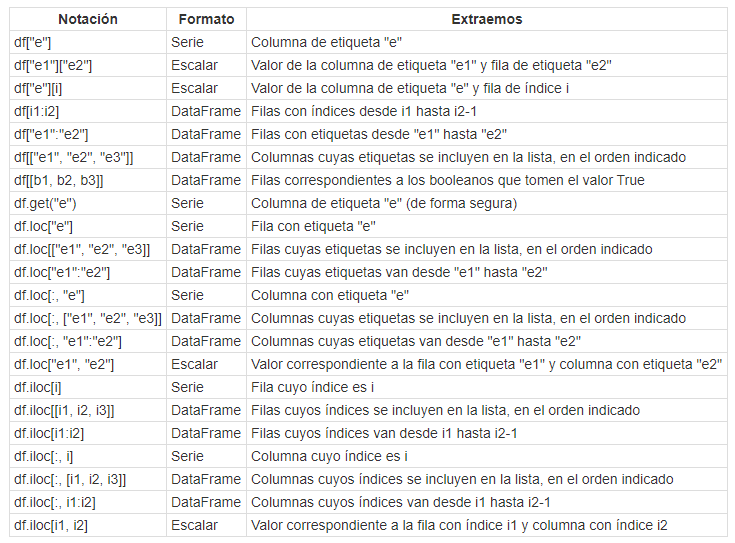

No se incluyen en el listado anterior combinaciones de estos métodos ni los métodos para la selección usando índices y etiquetas simultáneamente.

Aunque, a primera vista, pueda parecer bastante confuso, es posible destacar algunas reglas básicas:

Cuando se usan los métodos loc o iloc, el primer argumento siempre hace referencia a filas y el segundo a columnas. Esto significa que si no se incluye el segundo argumento, siempre estaremos extrayendo filas.
El método get devuelve columnas.
Sin incluir los métodos loc, iloc y get, solo hay -en el listado anterior- dos formas de extraer columnas: usando como argumento una etiqueta y usando como argumento una lista de etiquetas.
Del punto anterior extraemos como corolario que cualquier otra notación va a devolver filas (el uso de rangos y el uso de listas de booleanos).

Y, de hecho, si de los cuatro puntos anteriores quitamos los dos primeros por obvios, nos quedan dos reglas muy simples:

El uso de una etiqueta o de una lista de etiquetas devuelve columnas
En otros casos se devuelven filas (rangos de números o de etiquetas, o listas de booleanos)
Y, al respecto del tipo de estructura devuelta (si es un escalar, una serie o un dataframe) también es posible identificar una regla: salvo el caso más obvio en el que estemos extrayendo un valor resultante de la intersección de una fila y una columna, si la nomenclatura que estamos usado permite extraer más de una fila o de una columna (aunque estemos extrayendo solo una en un momento dado) devolverá siempre dataframes y, en caso contrario, series.

Por ejemplo, el uso de rangos permite extraer más de una fila (o de una columna), de forma que su uso siempre devuelve un dataframe. Así, df["e1":"e2"] siempre devolverá un dataframe, aunque en este ejemplo estemos usando el rango para extraer una única columna.

Otro ejemplo: si estamos usando la notación df.loc[:, "e"], estamos extrayendo una columna y solo una columna, y con esta notación (dos puntos para las filas y una etiqueta para columnas) nunca podríamos extraer más de una columna, de forma que el resultado de la extracción siempre será una serie.

### El método pop
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Otra forma de extraer datos es la proporcionada por el método [pandas.DataFrame.pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html), que extrae y elimina una columna de un dataframe:

In [204]:
Ventas

,A,B,C,D,E
ene,11,9,15,14,18
feb,1,15,1,15,15
mar,1,10,11,14,15
abr,1,9,6,14,1
may,1,11,18,20,10
jun,1,6,3,0,15


In [205]:
df = Ventas.copy()   # Para no modificar el datframe ventas original
s = df.pop("B")
s

ene     9
feb    15
mar    10
abr     9
may    11
jun     6
Name: B, dtype: int32

In [206]:
df

,A,C,D,E
ene,11,15,14,18
feb,1,1,15,15
mar,1,11,14,15
abr,1,6,14,1
may,1,18,20,10
jun,1,3,0,15


# Edición de series y dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Ya han ido apareciendo diferentes formas de modificar los datos contenidos en las estructuras ofrecidas por pandas, o de añadir nuevos datos. Recopilemos y ampliemos esta información en una única sección.

### Edición de series
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Podemos modificar un valor de una serie usando la notación corchetes, y haciendo referencia a índices o a etiquetas:

In [207]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [208]:
s[0] = -1
s["b"] = -2
s

a   -1
b   -2
c    3
d    4
e    5
dtype: int64

O con un rango de índices o de etiquetas:

In [209]:
s[1:3] = 0
s

a   -1
b    0
c    0
d    4
e    5
dtype: int64

In [210]:
s["b":"d"] = -10
s

a    -1
b   -10
c   -10
d   -10
e     5
dtype: int64

El valor puede ser un escalar -en cuyo caso se propaga- o puede ser una lista del tamaño del rango:

In [211]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s[1:3] = [-1, -2]
s

a    1
b   -1
c   -2
d    4
e    5
dtype: int64

In [212]:
s["b":"d"] = [10, 11, 12]
s

a     1
b    10
c    11
d    12
e     5
dtype: int64

Si el índice no existe se devuelve un error:

In [213]:
try:
    s[10]=2
except:
    print("Error")

Error


Pero si se trata de una etiqueta (y no existe) se añade:

In [214]:
s["f"] = 0
s

a     1
b    10
c    11
d    12
e     5
f     0
dtype: int64

Si el rango incluye valores que no existen, se ignoran:

In [215]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s["d":"h"] = 0
s

a    1
b    2
c    3
d    0
e    0
dtype: int64

Podemos incluir como argumento del operador selección una lista de etiquetas, en cuyo caso los valores se asignan en el orden indicado:

In [216]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [217]:
s[["c", "a"]] = [-1, -2]
s

a   -2
b    2
c   -1
d    4
e    5
dtype: int64

También podemos usar índices:

In [218]:
s[[1, 0]] = [20, 21]
s

a    21
b    20
c    -1
d     4
e     5
dtype: int64

Pero si coinciden los índices y las etiquetas, éstas tienen preferencia en este tipo de selección:

In [219]:
s = pd.Series([1, 2, 3, 4, 5], index = [0, 1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [220]:
s[[2, 1]] = [-2, -1]
s

0    1
1   -1
2   -2
3    4
4    5
dtype: int64

...o podemos usar los métodos *loc* e *iloc* para especificar a qué estamos haciendo referencia:

In [221]:
s = pd.Series([1, 2, 3, 4, 5], index = [0, 1, 2, 3, 4])
s.iloc[1] = -1
s

0    1
1   -1
2    3
3    4
4    5
dtype: int64

### Eliminación de elementos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

###### El método drop

El método [pandas.Series.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.drop.html) devuelve una copia de la serie tras eliminar el elemento cuya etiqueta se especifica como argumento:

In [222]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [223]:
r = s.drop("b")
r

a    1
c    3
d    4
e    5
dtype: int64

En este ejemplo hemos pasado como único argumento la etiqueta del elemento a eliminar, y el método ha devuelto la serie sin dicho elemento. Si la etiqueta no se encontrase en la serie, se devolvería un error.

También podemos pasar como argumento no una etiqueta, sino una lista de etiquetas. En este caso se eliminarán todos los elementos con dichas etiquetas:

In [224]:
r = s.drop(["d", "a"])
r

b    2
c    3
e    5
dtype: int64

Obsérvese que las etiquetas no tienen que estar en orden.

El argumento *inplace = True* realiza la eliminación "inplace" (modificando directamente la serie).

Este método exige el uso de etiquetas para seleccionar los elementos a eliminar. Esto significa que si en un momento dado necesitamos eliminar uno o más elementos por su índice, deberemos convertirlos en sus correspondientes etiquetas, lo que resulta extremadamente sencillo seleccionando los elementos adecuados del index. En el siguiente ejemplo, partimos del mismo ejemplo ya visto anteriormente:

In [225]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

Si quisiéramos eliminar los elementos cuyos índices son 1 y 3, bastaría recordar que el atributo *index* devuelve todas las etiquetas y que s.index[[1, 3]] devuelve las correspondientes a dichos índices:

In [226]:
s.index[[1, 3]]

Index(['b', 'd'], dtype='object')

Si pasamos esta expresión como argumento del método *drop*, obtendremos el resultado esperado:

In [227]:
s.drop(s.index[[1, 3]])

a    1
c    3
e    5
dtype: int64

###### El método pop

Otra forma que tenemos a nuestra disposición para eliminar un elemento de una serie es el método [pandas.Series.pop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pop.html). Al igual que con el método *drop*, éste solo acepta una etiqueta y devuelve el valor correspondiente a dicha etiqueta, eliminándolo de la serie in-place:

In [228]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [229]:
s.pop("b")

2

In [230]:
s

a    1
c    3
d    4
e    5
dtype: int64

Si la etiqueta no se encontrase en el index, el método devolvería un error.

### El método where
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método [pandas.Series.where](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html) permite filtrar los valores de una serie de forma que solo los que cumplan cierta condición se mantengan. Los valores que no la cumplan son sustituidos por un valor (*NaN* por defecto):

In [231]:
s = pd.Series(np.arange(0, 10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

Supongamos ahora que queremos filtrar los valores de s que sean pares:

In [232]:
s.where(s % 2 == 0)

0    0.0
1    NaN
2    2.0
3    NaN
4    4.0
5    NaN
6    6.0
7    NaN
8    8.0
9    NaN
dtype: float64

Comprobamos que los valores que no cumplen la condición son sustituidos por *NaN*. Podemos modificar este valor de reemplazo pasando al método como segundo argumento el valor que queremos fijar:

In [233]:
s.where(s % 2 == 0, -1)

0    0
1   -1
2    2
3   -1
4    4
5   -1
6    6
7   -1
8    8
9   -1
dtype: int32

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Genera un dataframe a partir de Ventas sustituyendo todos los valores mayores o iguales a 10 por ceros</div>
</div>

### Edición de dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Hemos visto la gran variedad de formas que tenemos a nuestra disposición para seleccionar elementos o bloques de elementos de un dataframe, y cada una de estas selecciones puede ser utilizada para modificar los valores contenidos en el dataframe. Veamos algunos ejemplos:

Podemos modificar un valor concreto usando los métodos **loc** o **iloc**, en función de que queramos usar sus etiquetas o índices:

In [234]:
a = np.random.randint(0, 21, size = (6, 5))
columns = ["A", "B", "C", "D", "E"]
index = ["ene", "feb", "mar", "abr", "may", "jun"]
Ventas = pd.DataFrame(a, index = index, columns = columns)
Ventas

,A,B,C,D,E
ene,9,15,7,14,4
feb,9,15,19,16,10
mar,3,1,2,7,19
abr,14,5,8,19,19
may,19,0,17,16,4
jun,14,16,12,15,8


In [235]:
df = Ventas.copy()
df.iloc[1, 2] = -100
df

,A,B,C,D,E
ene,9,15,7,14,4
feb,9,15,-100,16,10
mar,3,1,2,7,19
abr,14,5,8,19,19
may,19,0,17,16,4
jun,14,16,12,15,8


Podemos modificar una columna completa seleccionándola y asignándole, por ejemplo, una lista con los nuevos valores. Si partimos del mismo ejemplo que en el caso anterior...

In [236]:
df["C"] = [-100, -200, -300, -400, -500, -600]
df

,A,B,C,D,E
ene,9,15,-100,14,4
feb,9,15,-200,16,10
mar,3,1,-300,7,19
abr,14,5,-400,19,19
may,19,0,-500,16,4
jun,14,16,-600,15,8


En este caso, la longitud de la lista conteniendo los valores a insertar deberá coincidir con la longitud de la columna, salvo que en lugar de una lista se esté asignando un único valor, en cuyo caso se propagará a toda la columna.

In [237]:
df["C"] = -1
df

,A,B,C,D,E
ene,9,15,-1,14,4
feb,9,15,-1,16,10
mar,3,1,-1,7,19
abr,14,5,-1,19,19
may,19,0,-1,16,4
jun,14,16,-1,15,8


Si la selección es un bloque de datos de un tamaño arbitrario, nos encontramos en el mismo escenario: o bien insertamos datos con el mismo tamaño que la selección, o insertamos un único valor que se propagará a toda la selección. Veamos el primer caso:

In [238]:
df = Ventas.copy()
df.loc["feb":"mar", "A":"B"] = [[-100, -200], [-300, -400]]
df

,A,B,C,D,E
ene,9,15,7,14,4
feb,-100,-200,19,16,10
mar,-300,-400,2,7,19
abr,14,5,8,19,19
may,19,0,17,16,4
jun,14,16,12,15,8


En este ejemplo hemos seleccionado un bloque de 2x2, y hemos insertado datos con una estructura con las mismas dimensiones.

In [239]:
df = Ventas.copy()
df.loc["feb":"mar", "A":"B"] = -1
df

,A,B,C,D,E
ene,9,15,7,14,4
feb,-1,-1,19,16,10
mar,-1,-1,2,7,19
abr,14,5,8,19,19
may,19,0,17,16,4
jun,14,16,12,15,8


...y en este segundo caso hemos asignado un único valor a la misma selección.

Nos hemos encontrado también con el caso de insertar datos en una columna o fila inexistente, en cuyo caso se crea y se le asignan los valores en cuestión. En el primer caso (de columna inexistente):

In [240]:
df["F"] = [-1, -2, -3, -4, -5, -6]
df

,A,B,C,D,E,F
ene,9,15,7,14,4,-1
feb,-1,-1,19,16,10,-2
mar,-1,-1,2,7,19,-3
abr,14,5,8,19,19,-4
may,19,0,17,16,4,-5
jun,14,16,12,15,8,-6


Y en el segundo (de fila inexistente):

In [241]:
df.loc["jul"] = [1, 2, 3, 4, 5, 6]
df

,A,B,C,D,E,F
ene,9,15,7,14,4,-1
feb,-1,-1,19,16,10,-2
mar,-1,-1,2,7,19,-3
abr,14,5,8,19,19,-4
may,19,0,17,16,4,-5
jun,14,16,12,15,8,-6
jul,1,2,3,4,5,6


### El método where
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

De forma semejante a las series, el método de los dataframes [pandas.DataFrame.where](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html) filtra los valores contenidos en el dataframe de forma que solo los que cumplan cierta condición se mantengan. El resto de valores son sustituidos por un valor que, por defecto, es *NaN*.

Por ejemplo, partimos del siguiente dataframe:

In [242]:
Ventas

,A,B,C,D,E
ene,9,15,7,14,4
feb,9,15,19,16,10
mar,3,1,2,7,19
abr,14,5,8,19,19
may,19,0,17,16,4
jun,14,16,12,15,8


Si ahora queremos filtrar los valores múltiplos de 2, por ejemplo, podemos hacerlo de la siguiente forma:

In [243]:
Ventas.where(Ventas % 2 == 0)

,A,B,C,D,E
ene,NaN,NaN,NaN,14.0,4.0
feb,NaN,NaN,NaN,16.0,10.0
mar,NaN,NaN,2.0,NaN,NaN
abr,14.0,NaN,8.0,NaN,NaN
may,NaN,0.0,NaN,16.0,4.0
jun,14.0,16.0,12.0,NaN,8.0


Todos aquellos valores que no son múltiplo de 2 son sustituidos por *NaN*. Si, por ejemplo, quisiéramos cambiar de signo a los valores que no cumplen la condición impuesta, lo haríamos así:

In [244]:
Ventas.where(Ventas % 2 == 0, -df)

,A,B,C,D,E
ene,-9,-15,-7,14,4
feb,1,1,-19,16,10
mar,1,1,2,-7,-19
abr,14,-5,8,-19,-19
may,-19,0,-17,16,4
jun,14,16,12,-15,8


### Eliminación de elementos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) elimina las filas o columnas indicadas y devuelve el resultado, permitiéndose diferentes criterios para especificarlas.

El primer criterio consiste en indicar la lista de etiquetas a eliminar y el eje al que pertenecen. Partamos del siguiente dataframe:

In [245]:
Ventas

,A,B,C,D,E
ene,9,15,7,14,4
feb,9,15,19,16,10
mar,3,1,2,7,19
abr,14,5,8,19,19
may,19,0,17,16,4
jun,14,16,12,15,8


Podemos eliminar, por ejemplo, las filas cuyas etiquetas son "a" y "c" con el siguiente código:

In [246]:
Ventas.drop(["feb", "abr"], axis = 0)

,A,B,C,D,E
ene,9,15,7,14,4
mar,3,1,2,7,19
may,19,0,17,16,4
jun,14,16,12,15,8


Obsérvese que lo que se muestra es el resultado de eliminar las filas indicadas del dataframe. Éste no se modifica salvo que utilicemos el argumento **inplace = True**.

Como el eje por defecto es el 0, la instrucción anterior es equivalente a:

In [247]:
Ventas.drop(["feb", "abr"])

,A,B,C,D,E
ene,9,15,7,14,4
mar,3,1,2,7,19
may,19,0,17,16,4
jun,14,16,12,15,8


Para eliminar columnas, habría que indicar el eje correspondiente:

In [248]:
Ventas.drop(["A", "C"], axis = 1)

,B,D,E
ene,15,14,4
feb,15,16,10
mar,1,7,19
abr,5,19,19
may,0,16,4
jun,16,15,8


Otra alternativa para especificar si estamos eliminando filas o columnas es utilizar directamente los parámetros **index** y **columns**. Así, otra forma de eliminar las filas "feb" y "abr" sería la siguiente:

In [249]:
Ventas.drop(index = ["feb", "abr"])

,A,B,C,D,E
ene,9,15,7,14,4
mar,3,1,2,7,19
may,19,0,17,16,4
jun,14,16,12,15,8


-el resultado es el mismo que antes, lógicamente-. Y para eliminar las columnas "A" y "C":

In [250]:
Ventas.drop(columns = ["A", "C"])

,B,D,E
ene,15,14,4
feb,15,16,10
mar,1,7,19
abr,5,19,19
may,0,16,4
jun,16,15,8


<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga el dataframe iris con la siguiente instrucción:</div>
<div>iris = sns.load_dataset("iris")</div>
<ul>
    <li>Elimina las columnas que no sean numéricas</li>
</ul>
</div>

# Unión de series y dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Frecuentemente nos encontramos con que los datos a analizar están repartidos entre dos o más bloques de datos, lo que nos obliga a unirlos, bien concatenándolos, o bien realizando un "join" entre las estructuras (uniones del mismo tipo que las realizadas en bases de datos). Revisemos las funciones asociadas.

### Unión de series
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Comencemos revisando las opciones disponibles para las series pandas...

### La función concat
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Un caso con el que nos encontramos con relativa frecuencia es aquel en el que queremos unir una serie a otra. Por ejemplo:

In [251]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [252]:
r = pd.Series([10, 11, 12], index = ["f", "g", "h"])
r

f    10
g    11
h    12
dtype: int64

Si deseamos unir r y s en una nueva serie, podemos usar la función [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html). Esta función permite especificar el eje a lo largo del cual unir los diferentes objetos (pueden ser series o dataframes). Por defecto, la concatenación se realiza a lo largo del eje 0:

In [253]:
t = pd.concat([s, r])
t

a     1
b     2
c     3
d     4
e     5
f    10
g    11
h    12
dtype: int64

Por supuesto, el resultado es otra serie Pandas:

In [254]:
print(type(t))

<class 'pandas.core.series.Series'>


Si especificamos como eje de concatenación el eje 1, pandas alineará los valores con idénticas etiquetas. En el siguiente ejemplo, las series a y b tienen algunas etiquetas comunes (y otras no). El resultado incluye todas las etiquetas asignando el valor *NaN* ("Not a Number") a aquellos valores desconocidos:

In [255]:
a = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
a

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [256]:
b = pd.Series([10, 11, 12], index = ["a", "b", "f"])
b

a    10
b    11
f    12
dtype: int64

In [257]:
pd.concat([a, b], axis = 1, sort = True)

,0,1
a,1.0,10.0
b,2.0,11.0
c,3.0,NaN
d,4.0,NaN
e,5.0,NaN
f,NaN,12.0


(se ha utilizado el argumento sort = True para ocultar cierto aviso al respecto de un cambio en la funcionalidad de esta función en versiones futuras de la librería pandas)

Como puede observarse, el resultado es un dataframe:

In [258]:
type(pd.concat([a, b], axis = 1, sort = True))

pandas.core.frame.DataFrame

Por otro lado, ya sabemos que las etiquetas del índice no tienen por qué ser diferentes, de forma que si estuviésemos concatenando series con etiquetas comunes en sus índices, el resultado sería equivalente a los vistos hasta ahora:

In [259]:
s = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
r = pd.Series([10, 11, 12], index = ["a", "c", "e"])
pd.concat([s, r])

a     1
b     2
c     3
d     4
a    10
c    11
e    12
dtype: int64

En este ejemplo hemos concatenado dos series que tienen dos etiquetas comunes ("a" y "c"), y vemos que las dos apariciones de cada una de ellas se incluyen en el resultado de la concatenación.

### El método append
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Otra alternativa es usar el método [pandas.Series.append](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.append.html), versión simplificada de la función *concat* ya vista que devuelve la unión de la serie sobre la que se aplica con otra (u otras) series, pero solo a lo largo del eje 0. Veámoslo en funcionamiento:

In [260]:
a = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
b = pd.Series([10, 11, 12], index = ["f", "g", "h"])

In [261]:
a.append(b)

a     1
b     2
c     3
d     4
e     5
f    10
g    11
h    12
dtype: int64

Si el parámetro **ignore_index** toma el valor *True*, se ignoran los índices que existan y se asignan otros por defecto (índice numérico):

In [262]:
a.append(b, ignore_index = True)

0     1
1     2
2     3
3     4
4     5
5    10
6    11
7    12
dtype: int64

### Contatenación y unión de dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Ésta es otra de las áreas en las que la variedad de opciones puede resultar confusa. A modo de resumen, digamos que pandas ofrece dos principales funciones con este objetivo: **pandas.concat** y **pandas.merge**.

* La función concat permite concatenar dataframes a lo largo de un determinado eje
* La función merge permite realizar uniones (joins) entre dataframes tal y como se realizan en bases de datos. Esta función también está disponible como método: **pandas.DataFrame.merge**

Hay una tercera función que está disponible solo como método: **pandas.DataFrame.append**. El método append ofrece una funcionalidad semejante a la de la función *concat* pero reducida. Así, por ejemplo, solo permite realizar concatenaciones a lo largo del eje 0 (es decir, verticalmente).

Veamos en las siguientes secciones algunos ejemplos de estas funciones.

### La función concat
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

La función [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) es la responsable de concatenar dos o más dataframes (y de todas las estructuras proveídas por pandas) a lo largo de un eje, con soporte a lógica de conjuntos a la hora de gestionar etiquetas en ejes no coincidentes. Veamos un primer caso, el más sencillo posible, para el que partimos de los siguientes dos dataframes:

In [263]:
df1 = pd.DataFrame(
    np.arange(9).reshape([3, 3]),
    index = ["a", "b", "d"],
    columns = ["A", "B", "C"]
)
df1

,A,B,C
a,0,1,2
b,3,4,5
d,6,7,8


In [264]:
df2 = pd.DataFrame(
    np.arange(12).reshape([4, 3]),
    index = ["a", "b", "c", "e"],
    columns = ["B", "C", "D"]
)
df2

,B,C,D
a,0,1,2
b,3,4,5
c,6,7,8
e,9,10,11


Nota: tal y como ha ocurrido en secciones anteriores, en algunos de los ejemplos que se muestran a continuación se utiliza el argumento **sort = False** para evitar que se muestre un aviso al respecto de cierto cambio de funcionalidad que se producirá en futuras versiones de esta librería.

Si pasamos a la función *concat* ambos dataframes como primer argumento (en forma de lista), obtenemos el siguiente resultado:

In [265]:
pd.concat([df1, df2], sort = False)

,A,B,C,D
a,0.0,1,2,NaN
b,3.0,4,5,NaN
d,6.0,7,8,NaN
a,NaN,0,1,2.0
b,NaN,3,4,5.0
c,NaN,6,7,8.0
e,NaN,9,10,11.0


Vemos cómo, por defecto, la concatenación se ha realizado a lo largo del eje 0 (eje vertical), uniendo los índices de fila de ambos dataframes, y alineando las columnas por su etiqueta. Los valores para los que no hay datos se han rellenado con *NaN* (opción correspondiente al argumento por defecto **join = "outer"**).

Si especificamos que la concatenación se realice a lo largo del eje 1 (eje horizontal), el resultado es el siguiente:

In [266]:
pd.concat([df1, df2], axis = 1, sort = False)

,A,B,C,B,C,D
a,0.0,1.0,2.0,0.0,1.0,2.0
b,3.0,4.0,5.0,3.0,4.0,5.0
d,6.0,7.0,8.0,NaN,NaN,NaN
c,NaN,NaN,NaN,6.0,7.0,8.0
e,NaN,NaN,NaN,9.0,10.0,11.0


De modo semejante al primer ejemplo, se han introducido *NaN*'s allí donde no había datos, y se han alineado las filas por su etiqueta.

Estos dos ejemplos vistos son tipo "*Outer*" (opción por defecto), considerando todas las etiquetas de los dos dataframes aun cuando no sean comunes a ambos. Pero si especificamos el argumento **join = "Inner"**, los resultados pasan a considerar solo las etiquetas comunes. Así, para el primer ejemplo visto tenemos:

In [267]:
pd.concat([df1, df2], join = "inner")

,B,C
a,1,2
b,4,5
d,7,8
a,0,1
b,3,4
c,6,7
e,9,10


...incluyendo solo las columnas B y C comunes a ambos dataframes. Y para el segundo ejemplo tenemos:

In [268]:
pd.concat([df1, df2], axis = 1, sort = False, join = "inner")

,A,B,C,B,C,D
a,0,1,2,0,1,2
b,3,4,5,3,4,5


...incluyendo solo las filas a y b comunes a ambos dataframes.

El parámetro **ignore_index** controla el índice a asignar al eje a lo largo del cuál se realiza la concatenación. Si este parámetro toma el valor *False* (por defecto), el eje de concatenación mantiene las etiquetas de los dataframes originales. Si toma el valor *True*, se ignoran dichas etiquetas y el resultado de la concatenación recibe un nuevo índice automático numérico. Por ejemplo, si añadimos al código el argumento **ignore_index = True**, obtenemos el siguiente resultado:

In [269]:
pd.concat([df1, df2], axis = 1, sort = False, join = "inner", ignore_index = True)

,0,1,2,3,4,5
a,0,1,2,0,1,2
b,3,4,5,3,4,5


### El método append
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Como se ha comentado, el método [pandas.DataFrame.append](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) es un atajo de la función *concat* que ofrece funcionalidad semejante pero limitada: no permite especificar el eje de concatenación (siempre es el eje 0) ni el tipo de "join" (siempre es tipo "Outer").

Si seguimos con los mismos dataframes de la sección anterior:

In [270]:
df1

,A,B,C
a,0,1,2
b,3,4,5
d,6,7,8


In [271]:
df2

,B,C,D
a,0,1,2
b,3,4,5
c,6,7,8
e,9,10,11


...podemos ver cuál es el resultado de aplicar este método a df1:

In [272]:
df1.append(df2, sort = False)

,A,B,C,D
a,0.0,1,2,NaN
b,3.0,4,5,NaN
d,6.0,7,8,NaN
a,NaN,0,1,2.0
b,NaN,3,4,5.0
c,NaN,6,7,8.0
e,NaN,9,10,11.0


Al igual que ocurría con la función *concat*, el parámetro **ignore_index** nos permite controlar las etiquetas que recibe el índice del resultado: las de los dataframes originales (con *ignore_index = False*, opción por defecto), o uno nuevo automático (con *ignore_index = True*).

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Imagina que el dataframe Ventas contiene ventas de los productos para los meses incluidos. Ahora recibes las ventas de diciembre ("jul") para estos productos (1, 2, 3, 4 y 5, respectivamente, por ejemplo). Genera un dataframe concatenando a Ventas los nuevos datos usando el método append.</div>
</div>

### La función merge
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html

La función [pandas.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html) nos permite realizar "joins" entre tablas. El join es realizado sobre las columnas o sobre las filas. En el primer caso, las etiquetas de las filas son ignoradas. En cualquier otro caso (joins realizado entre etiquetas de filas, o entre etiquetas de filas y de columnas), las etiquetas de filas se mantienen.

Veamos un primer ejemplo. Partimos de dos tablas conteniendo las ventas y costes de producción para varios meses:

In [273]:
df1 = pd.DataFrame({
    "Month": ["ene", "feb", "mar", "may"],
    "Sales": [14, 8, 12, 17]
})
df1

,Month,Sales
0,ene,14
1,feb,8
2,mar,12
3,may,17


In [274]:
df2 = pd.DataFrame({
    "Month": ["feb", "ene", "mar", "abr"],
    "Cost": [7, 6, 8, 5]
})
df2

,Month,Cost
0,feb,7
1,ene,6
2,mar,8
3,abr,5


Vemos que ambos dataframes tienen una columna común ("Month") y varias filas comunes ("ene", "feb" y "mar"). Obsérvese que en df2 las filas no están ordenadas y que, en df1, el mes de enero tiene índice 0 mientras que, en df2, el mes de enero tiene índice 1.

Si aplicamos la función merge a estos dataframes con los valores por defecto, obtenemos el siguiente resultado:

In [275]:
pd.merge(df1, df2)

,Month,Sales,Cost
0,ene,14,6
1,feb,8,7
2,mar,12,8


Esos valores por defecto suponen que el join se realiza sobre las columnas comunes y tipo "inner" (considerando solo las filas con etiquetas comunes).

Si especificamos que el join sea de tipo "outer", lo que definimos con el parámetro **how**, el resultado considerará todas las etiquetas presentes en ambos dataframes:

In [276]:
pd.merge(df1, df2, how = "outer")

,Month,Sales,Cost
0,ene,14.0,6.0
1,feb,8.0,7.0
2,mar,12.0,8.0
3,may,17.0,NaN
4,abr,NaN,5.0


Como vemos, se ha rellenado con *NaN*'s los valores inexistentes. Otras opciones para el parámetro *how* son "*left*" y "*right*" (además de la opción por defecto, "outer").

Ya se ha comentado que, por defecto, el join se realiza entre las columnas comunes. Esto es, sin embargo, controlable usando el parámetro **on** y especificando la columna o columnas a usar. Por ejemplo, consideremos los siguientes dataframes:

In [277]:
df1 = pd.DataFrame({
    "Month": ["ene", "ene", "feb", "feb"],
    "Product": ["A", "B", "A", "B"],
    "Sales": [14, 8, 12, 17]
})
df1

,Month,Product,Sales
0,ene,A,14
1,ene,B,8
2,feb,A,12
3,feb,B,17


In [278]:
df2 = pd.DataFrame({
    "Month": ["ene", "ene", "feb", "feb"],
    "Product": ["A", "B", "A", "B"],
    "Cost": [7, 6, 8, 5]
})
df2

,Month,Product,Cost
0,ene,A,7
1,ene,B,6
2,feb,A,8
3,feb,B,5


Hay dos columnas comunes, lo que supone que el resultado de un merge por defecto sería el siguiente:

In [279]:
pd.merge(df1, df2)

,Month,Product,Sales,Cost
0,ene,A,14,7
1,ene,B,8,6
2,feb,A,12,8
3,feb,B,17,5


Es decir, para cada combinación de Mes-Producto se añadirían los valores de los campos de ventas y coste. Si quisiéramos que el join se realizase solo por uno de los campos, *Product*, por ejemplo, bastaría con especificarlo con el parámetro **on**:

In [280]:
pd.merge(df1, df2, on = "Product")

,Month_x,Product,Sales,Month_y,Cost
0,ene,A,14,ene,7
1,ene,A,14,feb,8
2,feb,A,12,ene,7
3,feb,A,12,feb,8
4,ene,B,8,ene,6
5,ene,B,8,feb,5
6,feb,B,17,ene,6
7,feb,B,17,feb,5


Además del campo utilizado para realizar el join ("*Product*"), al existir un campo común a ambos dataframes ("*Month*") que no se desea usar para el join, pandas añade un sufijo (configurable) a este campo en ambas tablas para poder diferenciarlo.

También podría ocurrir que ambos dataframes no tuviesen columnas comunes (columnas con el mismo nombre) pero que, aun así, quisiéramos realizar el join por algunas de ellas. Por ejemplo:

In [281]:
df1 = pd.DataFrame({
    "Month": ["ene", "feb", "mar", "may"],
    "Sales": [14, 8, 12, 17]
})
df1

,Month,Sales
0,ene,14
1,feb,8
2,mar,12
3,may,17


In [282]:
df2 = pd.DataFrame({
    "MonthName": ["feb", "ene", "mar", "abr"],
    "Cost": [7, 6, 8, 5]
})
df2

,MonthName,Cost
0,feb,7
1,ene,6
2,mar,8
3,abr,5


Al no haber columnas comunes, la ejecución de la función *merge* devolvería un error. En este caso podemos usar los parámetros **left_on** y **right_on** para especificar el campo a usar en la tabla de la izquierda del join y en la de la derecha, respectivamente:

In [283]:
pd.merge(df1, df2, left_on = "Month", right_on = "MonthName")

,Month,Sales,MonthName,Cost
0,ene,14,ene,6
1,feb,8,feb,7
2,mar,12,mar,8


Vemos cómo se realiza el join correctamente y se mantienen las columnas originales.

### Join por filas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Si queremos que el join considere las filas -y no las columnas- de alguno de los dataframes para realizar el join, podemos usar los parámetros **left_index** y **right_index**.

Supongamos, por ejemplo, que partimos de los siguientes dataframes:

In [284]:
df1 = pd.DataFrame({
    "Month": ["ene", "feb", "mar", "may"],
    "Sales": [14, 8, 12, 17]
})
df1

,Month,Sales
0,ene,14
1,feb,8
2,mar,12
3,may,17


In [285]:
df2 = pd.DataFrame({
    "Purchases": [5, 9, 11, 2, 6]
},
    index = ["ene", "feb", "mar", "abr", "may"]
)
df2

,Purchases
ene,5
feb,9
mar,11
abr,2
may,6


La ejecución de la función merge no sería posible -devolvería un error- pues no hay columnas columnes. En este caso querríamos que para el dataframe df1 se considerase la columna "*Month*" -usando el parámetro *left_on*- y para el dataframe df2 el índice -usando el parámetro *right_index*-, de la siguiente forma:

In [286]:
pd.merge(df1, df2, left_on = "Month", right_index = True)

,Month,Sales,Purchases
0,ene,14,5
1,feb,8,9
2,mar,12,11
3,may,17,6


# Operaciones con estructuras pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Al basarse la bibliteca pandas en NumPy, todas las funciones universales de esta última funcionarán con pandas, pero con una particularidad: al aplicar operaciones unarias se conservan las etiquetas de filas y columnas, y en funciones binarias, se van a alinear las filas y columnas de las estructuras involucradas por sus etiquetas.

### Operaciones con series
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Si aplicamos una función unaria a una serie, el resultado es otra serie que conserva los índices de la original:

In [287]:
r = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
r

a    1
b    2
c    3
d    4
dtype: int64

In [288]:
np.square(r)

a     1
b     4
c     9
d    16
dtype: int64

El resultado sigue siendo una serie pandas:

In [289]:
print(type(np.square(r)))

<class 'pandas.core.series.Series'>


Por otro lado, los operadores aritméticos que involucran dos o más series van a alinear las etiquetas antes de ejecutarse:

In [290]:
r = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
s = pd.Series([1, 2, 3, 4], index = ["b", "c", "d", "e"])
r + s

a    NaN
b    3.0
c    5.0
d    7.0
e    NaN
dtype: float64

En este ejemplo, hemos sumado dos series cuyas etiquetas no son todas comunes. Vemos cómo pandas ha rellenado los valores no coincidentes con *NaN*.

Si utilizamos el método [pandas.Series.add](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.add.html) se asigna a la serie sobre la que se aplica el método el resultado de la suma:

In [291]:
r = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
s = pd.Series([1, 2, 3, 4], index = ["b", "c", "d", "e"])
r.add(s)

a    NaN
b    3.0
c    5.0
d    7.0
e    NaN
dtype: float64

Usando este método es posible especificar el valor a usar para rellenar los elementos desconocidos usando el parámetro **fill_value**:

In [292]:
r = pd.Series([1, 2, 3, 4], index = ["a", "b", "c", "d"])
s = pd.Series([1, 2, 3, 4], index = ["b", "c", "d", "e"])
r.add(s, fill_value = 0)

a    1.0
b    3.0
c    5.0
d    7.0
e    4.0
dtype: float64

Obsérvese que, con este atributo, no estamos simplemente sustituyendo los *NaN* del resultado por el valor indicado, sino que estamos usando dicho valor como alternativa a los valores de las series originales que no existiesen. De esta forma, vemos que el valor de la suma para la etiqueta **&#97;** es 1, aun cuando esta etiqueta solo está presente en la serie r.

Otras funciones son:

* [pandas.Series.sub](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sub.html), que resta una serie a otra, elemento por elemento
* [pandas.Series.mul](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mul.html), que multipica una serie por otra, elemento por elemento
* [pandas.Series.div](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.div.html), que divide una serie por otra, elemento por elemento
* [pandas.Series.round](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.round.html), que redondea los elementos de una serie al número de decimales indicado

Tenemos en la documentación oficial el [listado completo de funciones disponibles para las series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html).

### Operaciones con dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Como se ha comentado, las operaciones binarias alinearán los datos de los dataframes involucrados según sus etiquetas de filas y columnas antes de ejecutarse. De esta forma, si partimos de los dos siguientes dataframes:

In [293]:
df1 = pd.DataFrame({"A":[2, 4, 2], 
                        "B":[1, 0, 4],
                        "C":[7, 3, 4]},
                     index = ["Ene", "Feb", "Mar"])
df1

,A,B,C
Ene,2,1,7
Feb,4,0,3
Mar,2,4,4


In [294]:
df2 = pd.DataFrame({"A":[3, 5, 2], 
                        "C":[1, 2, 3],
                        "D":[4, 3, 4]},
                     index = ["Feb", "Mar", "Abr"])
df2

,A,C,D
Feb,3,1,4
Mar,5,2,3
Abr,2,3,4


...podemos sumarlos obteniendo el siguiente resultado:

In [295]:
df1 + df2

,A,B,C,D
Abr,NaN,NaN,NaN,NaN
Ene,NaN,NaN,NaN,NaN
Feb,7.0,NaN,4.0,NaN
Mar,7.0,NaN,6.0,NaN


Vemos cómo pandas ha insertado *NaN*'s en aquellas combinaciones de etiquetas para las que no hay un valor en ambos dataframes.

Es de destacar -ya se ha comentado en secciones anteriores- que la alineación se produce con independencia del orden en el que las etiquetas aparezcan en los índices.

Podemos realizar la misma operación y asignar el resultado a uno de los dataframes con el método [pandas.DataFrame.add](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.add.html):

In [296]:
df1.add(df2)

,A,B,C,D
Abr,NaN,NaN,NaN,NaN
Ene,NaN,NaN,NaN,NaN
Feb,7.0,NaN,4.0,NaN
Mar,7.0,NaN,6.0,NaN


Con este método, de forma semejante a como ocurría con las series, es posible establecar un valor predeterminado para aquellos valores que no se encuentren en uno de los dataframes usando el parámetro **fill_value**:

In [297]:
df1.add(df2, fill_value = 0)

,A,B,C,D
Abr,2.0,NaN,3.0,4.0
Ene,2.0,1.0,7.0,NaN
Feb,7.0,0.0,4.0,4.0
Mar,7.0,4.0,6.0,3.0


Ahora, el valor correspondiente a A-Abr no es un *NaN*, sino 2 (valor que podemos encontrar en el dataframe df2). Aquellas combinaciones de etiquetas para las que no existe valor alguno en ninguno de los dos dataframes siguen recibiendo un *NaN*.

Se muestra a continuación un listado con algunas operaciones básicas disponibles como métodos de dataframes:

* [pandas.DataFrame.add](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.add.html): suma los dos dataframes, elemento por elemento
* [pandas.DataFrame.sub](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sub.html): resta a un dataframe otro dataframe, elemento por elemento
* [pandas.DataFrame.mul](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mul.html): multiplica un dataframe por otro, elemento por elemento
* [pandas.DataFrame.div](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.div.html): divide un dataframe por otro, elemento por elemento
* [pandas.DataFrame.mod](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mod.html): devuelve el resultado de calcular el módulo de un dataframe y otro dataframe, elemento por elemento
* [pandas.DataFrame.dot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html): devuelve la multiplicación de las dos matrices representadas por los dos dataframes
* [pandas.DataFrame.abs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.abs.html): devuelve una copia del dataframe conteniendo el valor absoluto de cada uno de sus valores

Podemos encontrar en la documentación oficial de pandas el [listado completo de funciones disponibles](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

### Métodos de agregación y estadística
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [298]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Los dataframes poseen un útil método que devuelve información estadística sobre los valores contenidos en él: [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html):

In [299]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Como se aprecia en el anterior resultado, este método devuelve el número de elementos no nulos por columna, el valor medio, la desviación estándar, el valor mínimo y el máximo, y los valores correspondientes a los percentiles 25, 50 y 75.

Otras funciones estadísticas útiles disponibles como métodos de los dataframes son:

###### mean

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

Devuelve la media aritmética de los valores del dataframe a lo largo de un determinado eje (eje 0 -vertical- por defecto):

In [300]:
tips.mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [301]:
tips.mean(axis = 1).head()

0     6.666667
1     5.000000
2     9.170000
3     9.663333
4    10.733333
dtype: float64

Otros métodos:

* [pandas.DataFrame.median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html): Devuelve la mediana de los valores del dataframe a lo largo de un determinado eje.
* [pandas.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html): Devuelve la moda de los valores del dataframe a lo largo de un determinado eje.
* [pandas.DataFrame.std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html): Devuelve la desviación estándar de los valores del dataframe a lo largo de un determinado eje.
* [pandas.DataFrame.var](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html): Devuelve la varianza de los valores del dataframe a lo largo de un determinado eje

###### pct_change

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html

Este método devuelve el porcentaje de cambio de una fila con respecto a la anterior (también puede aplicarse a columnas usando el parámetro **axis**):

In [302]:
Ventas

,A,B,C,D,E
ene,9,15,7,14,4
feb,9,15,19,16,10
mar,3,1,2,7,19
abr,14,5,8,19,19
may,19,0,17,16,4
jun,14,16,12,15,8


In [303]:
Ventas.pct_change()

,A,B,C,D,E
ene,NaN,NaN,NaN,NaN,NaN
feb,0.000000,0.000000,1.714286,0.142857,1.500000
mar,-0.666667,-0.933333,-0.894737,-0.562500,0.900000
abr,3.666667,4.000000,3.000000,1.714286,0.000000
may,0.357143,-1.000000,1.125000,-0.157895,-0.789474
jun,-0.263158,inf,-0.294118,-0.062500,1.000000


Podemos ver que los valores de la primera fila, al no existir una anterior con respecto a la que realizar el cálculo, reciben un valor *NaN* por defecto. En todo caso, es posible regular el comportamiento del método al respecto de los valores *NaN* con el parámetro **fill_method**.

###### nunique

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

El método **nunique** devuelve el número de valores diferentes a lo largo del eje indicado:

In [304]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

### Operaciones entre dataframes y series
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Podemos operar entre un dataframe y una serie. Por ejemplo, podemos partir de las siguientes estructuras:

In [305]:
df = pd.DataFrame({"A":[3, 5, 2], 
                    "B":[1, 2, 3],
                    "C":[4, 3, 4],
                    "D":[6, 3, 1]},
                    index = ["Jan", "Feb", "Mar"])
df

,A,B,C,D
Jan,3,1,4,6
Feb,5,2,3,3
Mar,2,3,4,1


In [306]:
s = pd.Series([2, 1, 0, 2], index = ["A", "B", "C", "D"])
s

A    2
B    1
C    0
D    2
dtype: int64

Si calculamos la suma de ambas, obtenemos el siguiente resultado:

In [307]:
df + s

,A,B,C,D
Jan,5,2,4,8
Feb,7,3,3,5
Mar,4,4,4,3


Comprobamos que la operación se ha realizado "row-wise", aplicando la suma fila por fila, tras haberse alineado el dataframe y la serie según las etiquetas del índice de columnas.

En el caso de que las columnas no sean completamente coincidentes, se rellenan los elementos desconocidos con *NaN*:

In [308]:
s = pd.Series([2, 1, 0, 2], index = ["A", "B", "E", "D"])
s

A    2
B    1
E    0
D    2
dtype: int64

In [309]:
df + s

,A,B,C,D,E
Jan,5.0,2.0,NaN,8.0,NaN
Feb,7.0,3.0,NaN,5.0,NaN
Mar,4.0,4.0,NaN,3.0,NaN


Es posible usar los métodos vistos en la sección anterior para operar también entre dataframes y series, pudiendo especificar el eje a lo largo del cual quiere realizarse la operación. Si seguimos con el ejemplo de la suma, podemos ejecutar el método **add** y especificar el eje deseado:

In [310]:
df

,A,B,C,D
Jan,3,1,4,6
Feb,5,2,3,3
Mar,2,3,4,1


In [311]:
s = pd.Series([2, 1, 0], index = ["Jan", "Feb", "Mar"])
s

Jan    2
Feb    1
Mar    0
dtype: int64

In [312]:
df.add(s, axis = 0)

,A,B,C,D
Jan,5,3,6,8
Feb,6,3,4,4
Mar,2,3,4,1


# Reindexación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Dedicaremos esta sección al importante proceso de reindexación: creación de una copia de una estructura pandas -una serie o un dataframe- en base a un nuevo índice. Comencemos con las series...

### Reindexación de series
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método básico para la reindexación de series es [pandas.Series.reindex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reindex.html). Este método devuelve una copia de una serie basándose en el índice modificado de la serie original. Para ver este método en funcionamiento partimos de la siguiente serie:

In [313]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "c", "f", "g", "j"])
s

a    1
c    2
f    3
g    4
j    5
dtype: int64

Se trata de una serie cuyas etiquetas son letras no consecutivas.

Podemos generar una copia reindexada de esta serie de la siguiente forma:

In [314]:
s.reindex(["g", "c", "a", "j", "f"])

g    4
c    2
a    1
j    5
f    3
dtype: int64

El primer argumento siempre es el nuevo índice. En el caso anterior se trata de una versión desordenada del índice original, por lo que la serie generada es también una versión desordenada de la original.

Si el nuevo índice es un subconjunto del original, la serie generada no contendrá todos los valores de la serie de la que partimos, tan solo los incluidos en el nuevo índice. En el siguiente ejemplo, el nuevo índice no incluye la etiqueta "a" por lo que la serie generada no incluye el valor correspondiente (1):

In [315]:
s.reindex(["g", "c", "j", "f"])

g    4
c    2
j    5
f    3
dtype: int64

Por el contrario, si en el nuevo índice se incluyen etiquetas no incluidas en el índice original, la nueva serie incluirá dicha etiqueta pero el valor asignado a ella recibe el valor por defecto *NaN*. En este próximo ejemplo incluimos la etiqueta "e" (no presente en el índice original) en el nuevo índice:

In [316]:
s.reindex(["g", "c", "e", "a", "j", "f"])

g    4.0
c    2.0
e    NaN
a    1.0
j    5.0
f    3.0
dtype: float64

Este valor de relleno (*NaN*) es personalizable usando el parámetro **fill_value**. Si repetimos las instrucciones anteriores especificando que el valor de relleno sea, por ejemplo, 0:

In [317]:
s.reindex(["g", "c", "e", "a", "j", "f"], fill_value = 0)

g    4
c    2
e    0
a    1
j    5
f    3
dtype: int64

Una alternativa a fijar el valor de relleno por defecto es aplicar "lógica de relleno", rellenando los valores inexistentes con otro valor que sí exista. Tenemos tres opciones:

###### Forward fill

La primera opción consiste en rellenar los valores inexistentes "hacia adelante", haciendo que los valores existentes rellenen los valores inexistentes que los sigan. O, en otras palabras, rellenar los valores inexistentes con el primer valor existente que los precedan:

In [318]:
s.reindex(["g", "c", "e", "a", "j", "f"], method = "ffill")

g    4
c    2
e    2
a    1
j    5
f    3
dtype: int64

En este caso, el valor correspondiente a la etiqueta "e" se rellena con el valor de la etiqueta anterior "c". Pero no la anterior en el nuevo índice, sino la anterior en el índice original. Veámoslos con otro ejemplo:

In [319]:
s.reindex(["g", "c", "m", "a", "j", "f"], method = "ffill")

g    4
c    2
m    5
a    1
j    5
f    3
dtype: int64

Ahora, la etiqueta nueva es "m", siendo precedida en el índice original por la "j" (si se ordenan alfabéticamente), por lo que el valor que recibe r["m"] es el que tenía r["j"]: 5.

###### Backward fill

En este otro caso, los valores inexistentes se rellenan "hacia atrás", con el primer valor existente que los siga:

In [320]:
s.reindex(["g", "c", "e", "a", "j", "f"], method = "bfill")

g    4
c    2
e    3
a    1
j    5
f    3
dtype: int64

Nuevamente, la etiqueta no existente en el índice original es "e", y el valor que se le asigna es el correspondiente a la etiqueta que seguía a "e" en dicho índice (si se ordenan alfabéticamente): "f". Por lo tanto, se asigna a r["e"] el valor de r["f"]: 3.

###### nearest

La tercera opción asigna a cada valor desconocido el valor más próximo en la serie original. Para ver esta opción en funcionamiento necesitamos partir de una serie cuyo índice sea numérico (la operación "sustracción" en la que se basa esta tercera opción no está soportada entre cadenas de texto). Partamos, por lo tanto, de la siguiente serie:

In [321]:
s = pd.Series([100, 200, 300, 400, 500], index = [10, 20, 30, 40, 50])
s

10    100
20    200
30    300
40    400
50    500
dtype: int64

Se trata de una serie cuyo índice está formado por múltiplos de 10. Generemos ahora una copia del mismo con el índice [20, 40, 19] aplicando como método de relleno "nearest":

In [322]:
s.reindex([20, 40, 19], method = "nearest")

20    200
40    400
19    200
dtype: int64

Comprobamos cómo el método ha incluido el índice 19 y le ha asignado el valor del índice más próximo (20), es decir, el valor de s[20] (200). Repitamos el ejemplo dando un valor distinto al nuevo índice:

In [323]:
s.reindex([20, 40, 11], method = "nearest")

20    200
40    400
11    100
dtype: int64

En este caso, el índice más próximo es 10, y el valor asignado es, por lo tanto, s[10]: 100.

## Reindexación de dataframes
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método [pandas.DataFrame.reindex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html) ofrece una funcionalidad semejante a la disponible para series con la particularidad de que, en este caso, podemos reindexar por filas y/o por columnas. Por defecto, este método acepta una secuencia de etiquetas que determinarán qué filas se incluyen y en qué orden (es decir, por defecto la reindexación se aplica al eje 0):

In [324]:
df = pd.DataFrame(np.arange(15).reshape([5, 3]), 
                  index = ["a", "b", "c", "d", "e"],
                  columns = ["A", "B", "C"])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11
e,12,13,14


In [325]:
df.reindex(["d", "b"])

,A,B,C
d,9,10,11
b,3,4,5


En este ejemplo, partimos de un dataframe cuyo índice de filas tiene las etiquetas "a", "b", "c", "d" y "e", y hemos indicado como nuevo índice apenas las etiquetas "d" y "b" (en este orden), y son estas filas (en ese orden) las que se devuelven como resultado.

Este método permite especificar las etiquetas de filas como hemos visto, pasándoselas al método como primer argumento, o con el parámetro **index**:

In [326]:
df.reindex(index = ["d", "b"])

,A,B,C
d,9,10,11
b,3,4,5


El resultado, por supuesto, es el mismo. El parámetro **columns**, por su parte, permite especificar el nuevo índice de columnas:

In [327]:
df.reindex(columns = ["A", "C"])

,A,C
a,0,2
b,3,5
c,6,8
d,9,11
e,12,14


Si utilizamos ambos parámetros al mismo tiempo, imponemos simultáneamente el nuevo índice para filas y columnas:

In [328]:
df.reindex(index = ["d", "b"], columns = ["A", "C"])

,A,C
d,9,11
b,3,5


La gestión de etiquetas que no existan en los índices iniciales es la misma que la vista para las series: se añaden y se les asigna el valor *NaN*:

In [329]:
df.reindex(index = ["a", "c", "f"], columns = ["A", "D", "C"])

,A,D,C
a,0.0,NaN,2.0
c,6.0,NaN,8.0
f,NaN,NaN,NaN


Podemos asignar a los valores inexistentes un valor concreto usando el parámetro **fill_value**, o podemos aplicar "lógica de relleno" con el parámetro **method**, permitiéndonos rellenar los valores inexistentes hacia adelante o hacia atrás.

Y, por supuesto, si los nuevos índices contienen los mismos elementos que los índices originales pero en otro orden, el resultado del método será equivalente al original ordenado según el nuevo criterio:

In [330]:
df.reindex(index = ["a", "c", "b", "e", "d"], columns = ["B", "C", "A"])

,B,C,A
a,1,2,0
c,7,8,6
b,4,5,3
e,13,14,12
d,10,11,9


### El método set_index
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método [pandas.DataFrame.set_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html) fija una columna del dataframe como índice, descartando el índice existente. Veamos un sencillo ejemplo. Partimos del siguiente dataframe:

In [331]:
df = pd.DataFrame({
    "año": [2016, 2017, 2018],
    "mes": ["ene", "sep", "jun"],
    "ventas": [87, 34, 112]
})
df

,año,mes,ventas
0,2016,ene,87
1,2017,sep,34
2,2018,jun,112


Vemos que se ha asignado un índice automático. Si ejecutamos el método **set_index** indicando como argumento el campo "mes":

In [332]:
df.set_index("mes")

,año,ventas
mes,,
ene,2016,87
sep,2017,34
jun,2018,112


...se fija dicha columna como índice y se elimina del conjunto de características. Aunque esta eliminación es el comportamiento por defecto, podemos controlarlo con el parámetro **drop**:

In [333]:
df.set_index("mes", drop = False)

,año,mes,ventas
mes,,,
ene,2016,ene,87
sep,2017,sep,34
jun,2018,jun,112


# Ordenación y clasificación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Otras útiles herramientas son aquellas que nos permiten ordenar las estructuras de datos de pandas -ordenación según los índices o según los valores- y las que permiten clasificar cada elemento de una estructura según su valor.

### Ordenación de series por índice

El método [pandas.Series.sort_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html) devuelve una copia de la serie ordenada según las etiquetas de forma ascendente. En el siguiente ejemplo partimos una serie de valores enteros cuyas etiquetas son también números enteros, y generamos una copia tras ordenarla según estos últimos valores:

In [334]:
s = pd.Series([0, 1, 2, 3, 4], index = [3, 1, 5, 0, 4])
s

3    0
1    1
5    2
0    3
4    4
dtype: int64

In [335]:
s.sort_index()

0    3
1    1
3    0
4    4
5    2
dtype: int64

También podemos realizar la ordenación en sentido descendente con el parámetro **ascending**:

In [336]:
s.sort_index(ascending = False)

5    2
4    4
3    0
1    1
0    3
dtype: int64

Si los índices fuesen cadenas de texto, se ordenarían de la "a" a la "z", dando a las mayúsculas mayor prioridad (siguiendo el criterio del estándar **Unicode**):

In [337]:
s = pd.Series([0, 1, 2, 3, 4], index = ["b", "d", "a", "A", "B"])
s

b    0
d    1
a    2
A    3
B    4
dtype: int64

In [338]:
s.sort_index()

A    3
B    4
a    2
b    0
d    1
dtype: int64

### Ordenación de series por valor

Si lo que deseamos es obtener una copia de una serie tras ordenarla según sus valores, el método [pandas.Series.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html) hace exactamente esto, permitiéndonos -entre otras cosas- escoger si la ordenación es ascendente -valor por defecto- o descendente:

In [339]:
s = pd.Series([7, 3, 6, 1, -4], index = ["a", "b", "c", "d", "e"])
s

a    7
b    3
c    6
d    1
e   -4
dtype: int64

In [340]:
s.sort_values()

e   -4
d    1
b    3
c    6
a    7
dtype: int64

En el ejemplo anterior vemos cómo el método **sort_values** ha devuelto la serie s ordenada según sus valores de forma ascendente, de -4 hasta 7. También podríamos haberla ordenado de forma descendente:

In [341]:
s.sort_values(ascending = False)

a    7
c    6
b    3
d    1
e   -4
dtype: int64

### Ordenación de dataframes por índice

Los dataframes también tienen el mismo método que las series, [pandas.DataFrame.sort_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html), que devuelven una copia del mismo tras ordenarlo según las etiquetas a lo largo de un determinado eje.

Comencemos con un ejemplo sencillo:

In [342]:
df = pd.DataFrame({"C":[-3, 5, 2], 
                   "A":[1, 0, 3],
                   "D":[4, 3, -4],
                   "B":[-2, 3, 1]},
                index = ["c", "a", "b"])
df

,C,A,D,B
c,-3,1,4,-2
a,5,0,3,3
b,2,3,-4,1


Los índices del dataframe son de tipo texto y susceptibles de ser ordenados alfabéticamene, de la "a" a la "z" o viceversa (ya se ha comentado que las mayúsculas son situadas antes que las minúsculas en una ordenación ascendente). Ordenemos el dataframe, por lo tanto, a lo largo del eje 0 (eje vertical) -opción por defecto si no se indica otra cosa-:

In [343]:
df.sort_index()

,C,A,D,B
a,5,0,3,3
b,2,3,-4,1
c,-3,1,4,-2


Efectivamente, las filas han sido ordenadas según el índice de filas. Especifiquemos que la ordenación del dataframe df sea por el eje 1 (eje horizontal):

In [344]:
df.sort_index(axis = 1)

,A,B,C,D
c,1,-2,-3,4
a,0,3,5,3
b,3,1,2,-4


En este caso vemos cómo han sido las columnas las que han sido ordenadas según sus etiquetas. Por supuesto, también tenemos la opción de recurrir al parámetro **ascending** para especificar el orden (ascendente o descendente):

In [345]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
c,4,-3,-2,1
a,3,5,3,0
b,-4,2,1,3


El método *sort_index* no permite especificar más que un único eje, por lo que si deseásemos realizar una segunda ordenación a lo largo del otro eje, tendríamos que volver a aplicar el mismo método:

In [346]:
df.sort_index().sort_index(axis = 1)

,A,B,C,D
a,0,3,5,3
b,3,1,2,-4
c,1,-2,-3,4


### Ordenación de dataframes por valor

El método [pandas.DataFrame.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) asociado a todo dataframe es el que nos va a permitir ordenarlo según sus valores. En el caso de una estructura de dos dimensiones, hay dos elementos que van a definir cómo realizar la ordenación: el eje escogido (eje 0, por defecto) y, dentro de ese eje, qué fila o columna (o qué filas o columnas) van a determinar el orden de los datos. Para ver algunos ejemplos, partamos del siguiente dataframe:

In [347]:
df = pd.DataFrame({"A":[3, 2, 2, 0],
                   "B":[1, 2, 2, 0],
                   "C":[0, 3, 1, 5],
                   "D":[2, 4, 5, 6]
                   },
                index = ["a", "b", "c", "d"])
df

,A,B,C,D
a,3,1,0,2
b,2,2,3,4
c,2,2,1,5
d,0,0,5,6


Supongamos que queremos ordenar esta estructura según la columna A, es decir, según el eje vertical o eje 0:

In [348]:
df.sort_values(by = "A")

,A,B,C,D
d,0,0,5,6
b,2,2,3,4
c,2,2,1,5
a,3,1,0,2


Al tratarse del eje por defecto, no ha sido necesario especificarlo mediante el parámetro **axis**. Las columnas (en este caso solo una) que determinan el criterio de ordenación se han indicado mediante el parámetro **by** (si se trata de una única fila o columna basta indicar el nombre de la misma. Si se tratase de más de una, habría que agregarlas en forma de lista). Por cierto, este método exige trabajar con etiquetas, no acepta índices.

Las filas se han reordenado de forma que la columna A muestre sus valores ordenados de menor a mayor. Las filas cuyas etiquetas son "b" y "c" , al tener el mismo valor en la columna "A", reciben una ordenadión por defecto (la que imponga el código que, probablemente, deja el mismo orden en el que aparecen en el dataframe original). Si quisiéramos ordenar las filas también según una segunda columna, podríamos hacerlo fácilmente:

In [349]:
df.sort_values(by = ["A", "C"])

,A,B,C,D
d,0,0,5,6
c,2,2,1,5
b,2,2,3,4
a,3,1,0,2


Las filas "b" y "c", que en el ejemplo anterior no se ordenaban entre sí pues no había criterio alguno que lo impusiese, ahora sí se muestran ordenadas según la columna "C".

Si deseásemos ordenar el dataframe según los valores de las filas "a" y "b", por ejemplo, y de mayor a menor, podríamos conseguirlo del siguiente modo:

In [350]:
df.sort_values(by = ["a", "b"], axis = 1, ascending = False)

,A,D,B,C
a,3,2,1,0
b,2,4,2,3
c,2,5,2,1
d,0,6,0,5


En este caso ha sido necesario especificar el eje de ordenación, al no tratarse del eje por defecto (argumento axis = 1).

### Clasificación de series

El método [pandas.Series.rank](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rank.html) devuelve una serie conteniendo la clasificación o posición de cada valor de la serie original si fuesen ordenados de menor a mayor. Veámoslo en funcionamiento. Partimos de la siguiente serie:

In [351]:
s = pd.Series([4, 2, 0, 3, 6], index = ["a", "b", "c", "d", "e"])
s

a    4
b    2
c    0
d    3
e    6
dtype: int64

Si ejecutamos el método **rank** asociado a esta serie, el resultado es el siguiente:

In [352]:
s.rank()

a    4.0
b    2.0
c    1.0
d    3.0
e    5.0
dtype: float64

In [353]:
print(type(s.rank()))

<class 'pandas.core.series.Series'>


Vemos que la estructura devuelta es una serie pandas, y que está formada por la posición o clasificación de cada elemento en la serie original. Así, por ejemplo, el menor valor de s era el 0 correspondiente a la etiqueta "c", de forma que, en la serie resultante de aplicar el método *rank*, el valor correspondiente a la etiqueta "c" es 1. El segundo valor de la serie s era el correspondiente a la etiqueta "b", que se muestra con el valor 2 en el resultado de rank, y así sucesivamente. Es decir, los valores de la serie resultante son los números desde 1 hasta n, siendo n el número de elementos de la serie original.

O, al menos, esto es así si no hay valores repetidos en la serie original pues, en ese caso, el método rank nos permite especificar cómo queremos clasificarlos, cosa que podemos hacer con el parámetro **method**. Por defecto, cada uno de los valores repetidos recibe el valor medio de las clasificaciones de cada uno de los valores suponiendo que se les aplicase como clasificación un número entero consecutivo. Es decir, si partimos de la siguiente serie:

In [354]:
s = pd.Series([4, 2, 2, 3, 3, 3, 6], index = ["a", "b", "c", "d", "e", "f", "g"])
s

a    4
b    2
c    2
d    3
e    3
f    3
g    6
dtype: int64

...podemos ver que el valor 2 está repetido dos veces, y que el valor 3 está repetido tres veces. Apliquemos el método rank con los argumentos por defecto:

In [355]:
s.rank()

a    6.0
b    1.5
c    1.5
d    4.0
e    4.0
f    4.0
g    7.0
dtype: float64

Si ordenásemos los valores de la serie s de menos a mayor, el resultado sería el siguiente:

2, 2, 3, 3, 3, 4, 5

Es decir, los valores 2 ocuparían las posiciones 1 y 2. Su valor medio es 1.5, que es el valor que les asigna el método *rank*. Los valores 3 ocuparían las posiciones 3, 4 y 5, cuyo valor medio es 4, y éste es el valor que les asigna el método *rank*.

En todo caso, el parámetro **method** del método nos permite escoger el criterio de asignación de la clasificación para valores repetidos: puede ser, por ejemplo, el menor valor (de los que recibirían si se asignasen valores no repetidos):

In [356]:
s.rank(method = "min")

a    6.0
b    1.0
c    1.0
d    3.0
e    3.0
f    3.0
g    7.0
dtype: float64

Vemos cómo se ha asignado a los dos valores correspondientes al menor valor (etiquetas "b" y "c") el valor 1 (mínimo de 1 y 2, posiciones que ocupan ambos números) y se ha asignado el valor 3 a los tres valores que ocupan las posiciones 3, 4 y 5.

### Clasificación de dataframes

De forma semejante a las series, los dataframes tienen el método [pandas.DataFrame.rank](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html), que devuelve la clasificación de cada valor a lo largo de un determinado eje. Veámoslo en funcionamiento:

In [357]:
sales = pd.DataFrame({"A":[3, 3, 1], 
                   "B":[1, 5, 2],
                   "C":[3, 7, 2],
                   "D":[7, 2, -1]},
                index = ["Jan", "Feb", "Mar"])
sales

,A,B,C,D
Jan,3,1,3,7
Feb,3,5,7,2
Mar,1,2,2,-1


In [358]:
sales.rank()

,A,B,C,D
Jan,2.5,1.0,2.0,3.0
Feb,2.5,3.0,3.0,2.0
Mar,1.0,2.0,1.0,1.0


La estructura devuelta por el método *rank* es otro dataframe, y el eje por defecto en el que se calculan las clasificaciones es el eje 0 (eje vertical). Vemos que el comportamiento es semejante al visto para las series (de hecho, podemos pensar que el método se aplica a cada columna por separado, siendo éstas, como sabemos, series). Por ejemplo, la primera columna está formada por las cifras 3, 3 y 1, y la clasificación es 2.5, 2.5 y 1 respectivamente, sabiendo que el 2.5 es la media de las posiciones 2 y 3 que dichas cifras ocuparían si la serie original se ordenase de menor a mayor.

También podemos aplicar el método a lo largo del eje 1 (eje horizonta):

In [359]:
sales.rank(axis = 1)

,A,B,C,D
Jan,2.5,1.0,2.5,4.0
Feb,2.0,3.0,4.0,1.0
Mar,2.0,3.5,3.5,1.0


En este caso, si consideramos la primera fila, los valores del dataframe original son 3, 1, 3 y 7, y su clasificación es 2.5, 1, 2.5 y 4, sabiendo nuevamente que el 2.5 es el valor medio de las posiciones 2 y 3 que ocuparían los valores repetidos (3) si se asignasen posiciones numéricas consecutivas.

El método *rank* tiene -ya lo hemos visto para series- el parámetro **ascending** que controla el orden de los resultados (ascendente o descendente) y el parámetro **method** que controla el criterio de clasificación para valores repetidos.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>A partir del dataset del Titanic, crea una nueva columna en la que se asigne un valor a cada pasajero en función del precio que haya pagado, de forma que el que más haya pagado reciba un 1, el siguiente un 2, etc.</div>
</div>

# Aplicación de funciones y mapeado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

pandas ofrece varios métodos para aplicar funciones a los valores de una serie o de un dataframe, o para sustituir dichos valores por otros aplicando un cierto "mapeado". Más concretamente nos encontramos con los siguientes métodos:

* [pandas.Series.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html): aplica una función a cada uno de los elementos de la serie cuyo resultado, por lo tanto, tendrá el mismo tamaño que la serie original.
* [pandas.Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html): devuelve una serie del mismo tamaño que la original en la que cada valor ha sido sustituido por otro valor resultante de aplicar una "función de mapeado".
* [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html): aplica una función a las filas o a las columnas de un dataframe. Si, por ejemplo, se aplica a las filas, el resultado será una serie con tantos valores como filas tuviese el dataframe original.
* [pandas.DataFrame.applymap](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html): aplica una función a cada uno de los elementos del dataframe que, por lo tanto, tendrá el mismo tamaño que el dataframe original.

Los nombres pueden parecer un tanto confusos: uno podría esperar que el método **apply** tuviese el mismo comportamiento en series y en dataframes y, en realidad, el método equivalente al *apply* de las series es el método **applymap** de los dataframes.

Revisemos estos métodos en esta sección.

### El método Series.apply

El método [pandas.Series.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) permite aplicar a cada uno de los elementos de la serie una función. Ésta deberá aceptar un único valor como argumento y devolver también un único valor. Por ejemplo, si tenemos la siguiente serie:

In [360]:
s = pd.Series([2, 5, 4])
s

0    2
1    5
2    4
dtype: int64

...y definimos una función que eleve al cubo el argumento de entrada:

In [361]:
def cubo(n):
    return n ** 3

...podemos usar el método **apply** para aplicar esta función a cada uno de los elementos de la serie s:

In [362]:
s.apply(cubo)

0      8
1    125
2     64
dtype: int64

El resultado es también una serie pandas.

### El método Series.map

El método [pandas.Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) aplicado a una serie s acepta un argumento que indica el tipo de mapeo a realizar y devuelve una serie equivalente a **&#115;** con sus valores una vez mapeados. Por ejemplo, supongamos que tenemos una serie cuyos valores representan el mes en el que se ha realizado una venta. Por ejemplo:

In [363]:
ventas = pd.Series([1, 2, 1, 1, 3, 1])
ventas

0    1
1    2
2    1
3    1
4    3
5    1
dtype: int64

Y supongamos que queremos generar una serie equivalente a ésta en la que cada mes aparezca representado por su nombre, y no por un número. Veamos por separado las opciones de las que disponemos:

###### Uso de un diccionario como función de mapeo

Una de las formas que tenemos de definir este "mapeo" entre números y cadenas de texto es utilizando un diccionario:

In [364]:
meses = {1:"Ene", 2:"Feb", 3:"Mar"}
meses

{1: 'Ene', 2: 'Feb', 3: 'Mar'}

Ahora, si ejecutamos el método **map** añadiendo como argumento este diccionario, se devolverá la serie que buscábamos:

In [365]:
ventas.map(meses)

0    Ene
1    Feb
2    Ene
3    Ene
4    Mar
5    Ene
dtype: object

###### Uso de una serie como función de mapeo

El método también admite como "función de mapeo" una serie:

In [366]:
meses = pd.Series(["Ene", "Feb", "Mar"], index = [1, 2, 3])
meses

1    Ene
2    Feb
3    Mar
dtype: object

In [367]:
ventas.map(meses)

0    Ene
1    Feb
2    Ene
3    Ene
4    Mar
5    Ene
dtype: object

En este caso, cada valor de la serie original (ventas, en nuestro ejemplo) se mapeará con el elemento cuya etiqueta coincida con él.

###### Uso de una función como función de mapeo

El tercer método al que podemos recurrir es utilizar una función que acepte como entradas los valores que se encuentren en la serie original y devuelva el resultado del mapeo. Por ejemplo:

In [368]:
def mes_str(n):
    if n == 1:
        return "Enero"
    elif n == 2:
        return "Febrero"
    elif n == 3:
        return "Marzo"

In [369]:
ventas.map(mes_str)

0      Enero
1    Febrero
2      Enero
3      Enero
4      Marzo
5      Enero
dtype: object

### El método DataFrame.apply

Los dataframes tienen un método con el mismo nombre que el método *apply* de las series, [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html), pero con funcionalidad diferente pues, en el caso de los dataframes, se aplica a lo largo de un eje del dataframe. Esto quiere decir que el argumento de entrada de la función a utilizar no va a ser un simple escalar, sino una serie cuyo índice va a ser el índice de filas del dataframe (si la función se aplica al eje 0) o el índice de columnas del dataframe (si la función se aplica al eje 1). El resultado del método también será una serie que estará formada por los valores calculados.

Por ejemplo, si tenemos el siguiente dataframe con las ventas de los productos A, B, C y D a lo largo de los meses de enero, febrero y marzo:

In [370]:
ventas = pd.DataFrame({"A":[3, 3, 1], 
                   "B":[1, 5, 2],
                   "C":[3, 7, 2],
                   "D":[7, 2, 3]},
                index = ["Ene", "Feb", "Mar"])
ventas

,A,B,C,D
Ene,3,1,3,7
Feb,3,5,7,2
Mar,1,2,2,3


...podríamos estar interesados en calcular el rango en el que se mueven las ventas, es decir, la diferencia entre el mayor y el menor valor de ventas. Para ello, sabiendo que dicho rango se va a aplicar a una fila o a una columna -es decir, a una serie-, definimos la siguiente función:

In [371]:
def rango(s):
    return max(s) - min(s)

Esta función acepta un iterable y devuelve la diferencia entre el valor máximo y el mínimo.

Ahora podemos aplicar esta función a nuestro dataframe de ventas. Por defecto se va a aplicar al eje 0 (eje vertical):

In [372]:
ventas.apply(rango)

A    2
B    4
C    5
D    5
dtype: int64

Si nos fijamos en la columna A, el valor máximo es 3 y el mínimo es 1, de forma que su diferencia es 2, tal y como se muestra en el resultado del método *apply*.

Si aplicamos el método a lo largo del eje 1 (eje horizontal), obtendremos la diferencia entre el mayor y el menor valor de cada fila:

In [373]:
ventas.apply(rango, axis = 1)

Ene    6
Feb    5
Mar    2
dtype: int64

### El método DataFrame.applymap

Al contrario de lo que ocurría con el método *apply* de los dataframes, el método [pandas.DataFrame.applymap](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) aplica una función que acepta y devuelve un único escalar, función que se va a aplicar a todos los elementos del dataframe.

Para ver un ejemplo partimos del siguiente dataframe:

In [374]:
ventas

,A,B,C,D
Ene,3,1,3,7
Feb,3,5,7,2
Mar,1,2,2,3


Supongamos que queremos saber si los valores son pares o no. Para ello definimos una función que acepta un valor de entrada y devuelve el booleano *True* si el valor es par y *False* en caso contrario:

In [375]:
def par(n):
    return n/2 == n//2

Ahora podemos aplicar el método añadiendo como argumento esta función:

In [376]:
ventas.applymap(par)

,A,B,C,D
Ene,False,False,False,False
Feb,False,False,False,True
Mar,False,True,True,False


Comprobamos que el resultado es un dataframe del mismo tamaño que el dataframe original en el que cada valor se ha sustituido por el resultado de aplicar la función indicada.

# Gestión de valores nulos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Un aspecto crítico en todo análisis de datos es la gestión de los valores nulos, representados en pandas por la valor real **NaN** ("Not a Number").

pandas ofrece diferentes funciones y métodos para gestionar estos valores. Veamos los más importantes.

### La función isnull

La función [pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) devuelve una estructura con las mismas dimensiones que la que se cede como argumento sustituyendo cada valor por el booleano *True* si el correspondiente elemento es un valor nulo, y por el booleano *False* en caso contrario.

Esta función es equivalente a [pandas.isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isna.html).

Por ejemplo, podemos aplicarla a una serie:

In [377]:
s = pd.Series([1, np.nan, 7, np.nan, 3])
s

0    1.0
1    NaN
2    7.0
3    NaN
4    3.0
dtype: float64

In [378]:
pd.isnull(s)

0    False
1     True
2    False
3     True
4    False
dtype: bool

Esta funcionalidad también se ofrece como método:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isnull.html

In [379]:
s.isnull()

0    False
1     True
2    False
3     True
4    False
dtype: bool

También podemos aplicarla a un dataframe:

In [380]:
ventas = pd.DataFrame({"A":[3, np.nan, 1], 
                   "B":[1, 5, np.nan],
                   "C":[3, 7, 2],
                   "D":[np.nan, 2, np.nan]},
                   index = ["Ene", "Feb", "Mar"])
ventas

,A,B,C,D
Ene,3.0,1.0,3,NaN
Feb,NaN,5.0,7,2.0
Mar,1.0,NaN,2,NaN


In [381]:
pd.isnull(ventas)

,A,B,C,D
Ene,False,False,False,True
Feb,True,False,False,False
Mar,False,True,False,True


...recibiendo como resultado un dataframe.

También en este caso la funcionalidad está accesible como método:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

In [382]:
ventas.isnull()

,A,B,C,D
Ene,False,False,False,True
Feb,True,False,False,False
Mar,False,True,False,True


### El método dropna

El método **dropna** permite, de una forma muy conveniente, filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.

Aplicado a una serie, el método [pandas.Series.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html) devuelve una nueva serie tras eliminar los valores nulos:

In [383]:
s = pd.Series([1, np.nan, 7, np.nan, 3])
s

0    1.0
1    NaN
2    7.0
3    NaN
4    3.0
dtype: float64

In [384]:
s.dropna()

0    1.0
2    7.0
4    3.0
dtype: float64

Aplicado a un dataframe, el método [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) ofrece algo más de funcionalidad: podemos escoger si queremos eliminar filas o columnas, y si queremos eliminarlas cuando todos sus elementos sean nulos o simplemente cuando alguno de ellos lo sea. Por ejemplo:

In [385]:
ventas = pd.DataFrame({"A":[1, 5, 4, 7], 
                   "B":[3, 4, 1, np.nan],
                   "C":[3, 7, 2, 1],
                   "D":[np.nan, 2, 2, 3]},
                   index = ["Ene", "Feb", "Mar", "Abr"])
ventas

,A,B,C,D
Ene,1,3.0,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,NaN,1,3.0


Por defecto, el método se aplica al eje 0, es decir, va a eliminar filas que incluyan valores nulos:

In [386]:
ventas.dropna()

,A,B,C,D
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0


Si especificamos el eje 1, lo que se eliminan son las columnas que incluyan valores nulos:

In [387]:
ventas.dropna(axis = 1)

,A,C
Ene,1,3
Feb,5,7
Mar,4,2
Abr,7,1


Mediante el parámetro **how** podemos controlar cómo queremos que se aplique el método: si toma el valor "*all*", solo se eliminarán las filas o columnas en las que todos sus elementos sean nulos. Si toma el valor "*any*" (valor por defecto), se eliminarán las filas o columnas en las que algún elemento sea nulo. De esta forma:

In [388]:
ventas.dropna(how = "all")

,A,B,C,D
Ene,1,3.0,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,NaN,1,3.0


Vemos cómo ninguna fila se ha eliminado pues en ninguna de ellas todos los elementos nulos.

Sin embargo:

In [389]:
ventas.dropna(how = "any")

,A,B,C,D
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0


...sí elimina varias filas

### El método fillna

El método **fillna** permite sustituir los valores nulos de una estructura pandas por otro valor según ciertos criterios: pueden sustituirse por un valor concreto o bien puede utilizarse el anterior o posterior valor no nulo (en el caso de los dataframes habrá que especificar el eje sobre el que queremos aplicar la función).

Veamos el caso de ejecutar este método en una serie ([pandas.Series.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html)):

In [390]:
s = pd.Series([1, np.nan, 7, np.nan, 3])
s

0    1.0
1    NaN
2    7.0
3    NaN
4    3.0
dtype: float64

In [391]:
s.fillna(0)

0    1.0
1    0.0
2    7.0
3    0.0
4    3.0
dtype: float64

Hemos indicado el valor 0 como argumento, y es este valor el que se utiliza para sustituir los valores nulos de la serie original.

También podríamos haber especificado que el método a utilizar fuese, por ejemplo, el "forward fill" ("*ffill*"), de forma que los valores no nulos se copien "hacia adelante" siempre que se encuentren valores nulos. Esto se indicaría con el parámetro **method**:

In [392]:
s.fillna(method = "ffill")

0    1.0
1    1.0
2    7.0
3    7.0
4    3.0
dtype: float64

Vemos cómo los valores nulos se han rellenado con el anterior valor no nulo (o, dicho con otras palabras, cómo los valores no nulos se han extendido hacia adelante).

Si especificamos el método "backward fill" ("*bfill*"):

In [393]:
s.fillna(method = "bfill")

0    1.0
1    7.0
2    7.0
3    3.0
4    3.0
dtype: float64

...los valores nulos se han rellenado con el siguiente valor no nulo.

En el caso de los dataframes ([pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)), la funcionalidad es semejante. Como se ha comentado, la mayor diferencia consiste en que, en el caso de querer rellenar los valores nulos con el anterior o posterior no nulo, habrá que indicar el eje del que obtener estos datos. 

Veamos un ejemplo práctico. Si partimos de este dataframe:

In [394]:
ventas = pd.DataFrame({"A":[1, 5, 4, 7], 
                   "B":[3, 4, 1, np.nan],
                   "C":[3, 7, 2, 1],
                   "D":[np.nan, 2, 2, 3]},
                   index = ["Ene", "Feb", "Mar", "Abr"])
ventas

,A,B,C,D
Ene,1,3.0,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,NaN,1,3.0


...podemos sustituir los valores nulos por una cifra concreta:

In [395]:
ventas.fillna(0)

,A,B,C,D
Ene,1,3.0,3,0.0
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,0.0,1,3.0


Si aplicamos el método de "forward fill" a lo largo del eje 0 (eje por defecto):

In [396]:
ventas.fillna(method = "ffill")

,A,B,C,D
Ene,1,3.0,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,1.0,1,3.0


...vemos cómo el primer valor de la columna D no se ha modificado pues no hay ningún valor anterior (en el eje 0) del que tomar el valor.

Y si aplicamos el método "backward fill" a lo largo del eje 1:

In [397]:
ventas.fillna(axis = 1, method = "bfill")

,A,B,C,D
Ene,1.0,3.0,3.0,NaN
Feb,5.0,4.0,7.0,2.0
Mar,4.0,1.0,2.0,2.0
Abr,7.0,1.0,1.0,3.0


...vemos que, también en este caso, el valor de la columna D correspondiente a enero no se ha modificado pues, nuevamente, no hay un valor posterior (en el eje 1) del que tomar el valor.

En un caso práctico puede resultar recomendable utilizar "lógica de relleno" seguida de la asignación de un valor por defecto para los valores nulos que puedan seguir existiendo, para asegurarnos de que todos ellos han sido sustituidos adecuadamente:

In [398]:
ventas.fillna(axis = 1, method = "bfill").fillna(0)

,A,B,C,D
Ene,1.0,3.0,3.0,0.0
Feb,5.0,4.0,7.0,2.0
Mar,4.0,1.0,2.0,2.0
Abr,7.0,1.0,1.0,3.0


<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>A partir del dataframe del Titanic, sustituye todos los NaN's de la columna *age* por la edad media de los pasajeros para los que sí se dispone de dicho dato.</div>
</div>

# Agrupaciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Las agrupaciones realizadas con el método de series y dataframes **groupby** son una herramienta un tanto más sofisticada pero extremadamente útil en ciertas circunstancias. También resulta muy útil la creación de tablas dinámicas a partir de un dataframe utilizando el método **pivot_table**. Veamos algunos ejemplos sencillos de estas funciones.

### Agrupaciones en series

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.groupby.html

El método que permite agrupar una serie es [pandas.Series.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.groupby.html). En su sintaxis más básica, requiere el parámetro **by** o el parámetro **level**. Veamos ambos casos y partamos de la siguiente serie para probarlos:

In [399]:
s = pd.Series([2, 4, 1, 6, 2], index = ["A", "B", "C", "A", "C"])
s

A    2
B    4
C    1
A    6
C    2
dtype: int64

El parámetro **by** se usa para determinar los grupos. Puede ser una función -que se aplicará a todos los elementos del índice-, un diccionario o una serie -en cuyo caso serán los valores los que determinen los grupos.

Para ver el método *groupby* en funcionamiento con una función que determine los grupos, definamos una que simplemente devuelva la concatenación del texto "Grupo " y el valor que recibe: recordemos que esta función se va a aplicar sobre el índice de la serie, es decir, sobre los elementos "A", "B", etc. La función devolverá, por lo tanto, "Grupo A", "Grupo B", etc. y serán estas etiquetas las que determinen los grupos:

In [400]:
def grupo(s):
    return("Grupo " + s)

El resultado de la agrupación es un objeto (*SeriesGroupBy* en el caso de las series) que contiene información sobre las agrupaciones pero no es visible. Lo que sí podemos hacer es aplicar a este objeto una función de agregación, por ejemplo el método mean() para obtener el valor medio de la serie original para cada uno de los grupos. En este caso tendríamos:

In [401]:
s.groupby(by = grupo).mean()

Grupo A    4.0
Grupo B    4.0
Grupo C    1.5
dtype: float64

Hemos comentado que el método puede también recibir como parámetro **by** un diccionario, en cuyo caso serán los valores los que determinen los nombres de los grupos a crear tras mapear las claves del diccionario con las etiquetas de la serie. En nuestro caso, las etiquetas de la serie son "A", "B", etc., por lo que podemos usar el siguiente diccionario para mapear estos valores con los nombres de los grupos a crear: "Producto A", "Producto B", etc. en este ejemplo:

In [402]:
d = {"A":"Producto A", "B":"Producto B", "C":"Producto C"}

Ahora, si aplicamos el método con este diccionario:

In [403]:
s.groupby(by = d).mean()

Producto A    4.0
Producto B    4.0
Producto C    1.5
dtype: float64

Vemos que obtenemos un resultado semejante al anterior.

Si, en lugar de hacer uso del parámetro *by*, hacemos uso del parámetro *level*, tendríamos que indicar el nivel del índice según el cual queremos realizar la agrupación (lo que tiene sentido en series con multi índice o índice jerárquico). Si indicamos como nivel el 0, sencillamente estaremos agrupando según las etiquetas de la serie:

In [404]:
s.groupby(level = 0).mean()

A    4.0
B    4.0
C    1.5
dtype: float64

### Agrupaciones en dataframes

El método [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) tiene una funcionalidad semejante a la vista para series, con los condicionantes propios de los dataframes: es necesario indicar el eje que contiene el criterio por el que se va a realizar la agrupación. Comencemos con un ejemplo sencillo. Partimos del siguiente dataframe:

In [405]:
df = pd.DataFrame({
    "Producto":["A", "B", "C", "B", "A", "A"],
    "Ventas": [6, 2, 1, 4, 5, 2]
})
df

,Producto,Ventas
0,A,6
1,B,2
2,C,1
3,B,4
4,A,5
5,A,2


En el caso de los dataframes, el parámetro **by** puede hacer referencia a una función, a un diccionario, a una etiqueta o a una lista de etiquetas. Si pasamos simplemente la etiqueta "*Producto*" para indicar que la agrupación se realice según los valores de esta columna, tenemos:

In [406]:
df.groupby(by = "Producto").mean()

,Ventas
Producto,
A,4.333333
B,3.000000
C,1.000000


Si quisiéramos realizar la agrupación por más de una columna, bastaría con pasar como argumento una lista con las etiquetas en cuestión. Por ejemplo, consideremos el siguiente caso en el que tenemos las ventas clasificadas por categoría y producto:

In [407]:
ventas = pd.DataFrame({
    "Categoría": [1, 2, 1, 1, 2, 1],
    "Producto":["A", "B", "C", "B", "A", "A"],
    "Ventas": [6, 2, 1, 4, 5, 2]
})
ventas

,Categoría,Producto,Ventas
0,1,A,6
1,2,B,2
2,1,C,1
3,1,B,4
4,2,A,5
5,1,A,2


Si aplicamos ahora el método *groupby* con el argumento *by = ["Categoría", "Producto"]*, tenemos:

In [408]:
ventas.groupby(by = ["Categoría", "Producto"]).mean()

Ventas
Categoría Producto        
1         A              4
          B              4
          C              1
2         A              5
          B              2

In [409]:
ventas = pd.DataFrame({
    "Ventas": [6, 2, 1, 4, 5, 2]
}, index = ["A", "B", "C", "B", "A", "A"])
ventas

,Ventas
A,6
B,2
C,1
B,4
A,5
A,2


Si ejecutamos el método con el argumento *level = 0*, obtendríamos el siguiente resultado:

In [410]:
ventas.groupby(level = 0).mean()

,Ventas
A,4.333333
B,3.000000
C,1.000000


### Tablas dinámicas

Una tabla dinámica (o pivot table en inglés) es una tabla que muestra información resumida extraída de otra tabla. Esta última es un listado de muestras (registros o puntos) con un cierto número de campos o características, por ejemplo:

In [411]:
df = pd.DataFrame({
    'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
    'baz': [1, 2, 3, 4, 5, 6],
    'zoo': ['x', 'y', 'z', 'q', 'w', 't']
})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


Una tabla dinámica va a agrupar información a partir de esta tabla de la siguiente forma:

1. Va a seleccionar una (o más) características para ocupar el índice de filas, de forma que cada valor que tome dicha característica se muestre en una fila
1. Va a seleccionar una (o más) características para ocupar el índice de columnas, de forma que cada valor que tome dicha característica se muestre en una columna
1. Va a seleccionar una (o más) características para ocupar las intersecciones de filas y columnas
1. Al conjunto de registros representados en cada una de esas intersecciones les va a aplicar una función de agregación, que puede ser tan simple como un recuento, cálculo del valor medio, etc.

El método [pandas.DataFrame.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html) crea una tabla dinámica de esta forma a partir de un dataframe. Veamos varios ejemplos comenzando por los más simples:

En el dataframe visto comprobamos que la características *foo* toma dos posibles valores (one y two), y la característica *bar* toma tres (A, B y C). Podríamos mostrar la distribución de la variable *baz* respecto de *foo* y *bar* de la siguiente forma:

In [412]:
df.pivot_table(index = "foo", columns = "bar", values = "baz")

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


En este caso, los valores que toma la característica incluida en el parámetro **index** van a distribuirse a lo largo del eje vertical, y los valores que toma la característica incluida en el parámetro **columns** van a distribuirse a lo largo del eje horizontal. Los valores que toma la variable incluida en el **parámetro** values van a la intersección de filas y columnas, aplicándoseles una cierta función de agregación que, por defecto, es *np.mean* (cálculo del valor medio). El ejemplo mostrado es muy pequeño y para cada intersección de filas y columnas solo hay un registro, de forma que el valor medio del valor contenido en la columna baz de cada registro coincide con el mismo valor. Por ejemplo, la intersección de foo = one y bar = A representa un conjunto de registros del dataframe que, en nuestro caso, se limita a un único registro (el registro con índice 0) en el que el valor de baz es 1, y su valor medio es 1.

Podemos aplicar otra función de agregación utilizando el parámetro **aggfunc**:

In [413]:
df.pivot_table(index = "foo", columns = "bar", values = "baz", aggfunc = "count")

bar,A,B,C
foo,,,
one,1,1,1
two,1,1,1


En este ejemplo hemos contado el número de registros representados en cada intersección.

Es posible aplicar más de una función de agregación a los datos. En el siguiente ejemplo aplicamos tanto la función de cálculo del valor medio como el recuento:

In [414]:
df.pivot_table(index = "foo", columns = "bar", values = "baz", aggfunc = ["mean", "count"])

mean       count      
bar    A  B  C     A  B  C
foo                       
one    1  2  3     1  1  1
two    4  5  6     1  1  1

Como puede comprobarse, pandas crea un conjunto de columnas diferente para cada función de agregación.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>A partir del dataset del Titanic, muestra el número de pasajeros y la edad media de los supervivientes segmentando los datos por cubierta (campo "deck") y sexo de cada pasajero.</div>
</div>

# Lectura y escritura de ficheros
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

La principal función ofrecida por pandas para la lectura de datos desde un fichero es [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Esta función lee un fichero de valores separados por comas (formato CSV) y lo vuelca en un dataframe, incluyéndo gran candidad de parámetros para determinar cómo se realiza la lectura y cómo deberán tratarse los datos leídos. Los más destacados son los siguientes:

* **header**: Este parámetro determina qué fila o filas se usarán como etiquetas de columnas. Por defecto se usarán los valores de la primera línea del fichero. Si los datos no tienen cabecera, deberá indicarse por medio de header = None.
* **names**: Lista de nombres de columnas a usar.
* **index_col**: Columna a usar como índice de filas.
* **parse_dates**: Determina si las columas conteniendo fechas pero estén en otros formatos (texto) deberán ser convertidas a formato de fechas o no.
* **nrows**: Número del filas del fichero a leer. Útil si se desea leer un fichero en bloques.
* **compression**: Especifica si deberá aplicarse un algoritmo de descompresión a los datos ("zip", "gzip", etc.)

Por otro lado, el método [pandas.Series.to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) permite almacenar una serie en un fichero con formato CSV, incluyéndose igualmente gran cantidad de argumentos para controlar cómo hacer el volcado. El método equivalente para dataframes es [pandas.DataFrame.to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Guarda el dataframe iris en un fichero y vuelve a leerlo.</div>
</div>

### Lectura de datos de una API Rest

Como ejemplo de lectura de datos de una fuente no local, utilizaremos la API Rest proporcionada por https://locationiq.com/. El objetivo es, a partir de un listado de coordenadas, geocodificarlas de forma inversa para obtener las direcciones de dichos puntos.

Para conseguir un listado de coordenadas vamos a descargar a nuestro equipo el listado de países y coordenadas que podemos encontrar en la siguiente página web de Kaggle:

https://www.kaggle.com/eidanch/counties-geographic-coordinates

El fichero se descargará con el nombre de "countries.csv".

Una vez descargado podemos leerlo desde pandas:

In [415]:
countries = pd.read_csv("countries.csv")
countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


Para no saturar al proveedor, podemos trabajar apenas con un listado de países escogidos arbitrariamente:

In [416]:
countries_list = ["Spain", "Portugal", "France", "United Kingdom", "Argentina", "Brazil"]
countries = countries[countries.name.isin(countries_list)]
countries

,country,latitude,longitude,name
10,AR,-38.416097,-63.616672,Argentina
28,BR,-14.235004,-51.925280,Brazil
64,ES,40.463667,-3.749220,Spain
71,FR,46.227638,2.213749,France
73,GB,55.378051,-3.435973,United Kingdom
180,PT,39.399872,-8.224454,Portugal


Importamos las librerías necesarias para realizar la llamada a la API e interpretar la respuesta en formato JSON:

In [417]:
import requests
import json
import time
from pandas.io.json import json_normalize

A continuación deberemos darnos de alta en https://locationiq.com/. Obtendremos un "token" que deberemos usar en el código.

[En la documentación](https://locationiq.com/docs#forward-geocoding) podemos confirmar cómo generar la url con la que deberemos llamar a la API.

In [418]:
token = "000000000000" # Introduce aquí el token que hayas recibido
base_url = 'https://eu1.locationiq.org/v1/reverse.php?key=' + token

Necesitamos definir una función que acepte una fila de nuestro dataframe "countries", invoque la API Rest y reciba la respuesta (que tendrá formato JSON):

In [419]:
def reverse_geocode(row):
    try:
        url = base_url + '&lat=' + str(row['latitude']) + '&lon=' + str(row['longitude']) + '&format=json'
        response = (requests.get(url).text)
        response_json = json.loads(response)
        time.sleep(1)
        return response_json
    
    except Exception as e:
        raise e

A continuación hacemos pasar todas las filas de nuestro dataframe por la función, recibiendo la geocodificación para cada una de ellas. Utilizaremos para ello el método .apply:

In [420]:
countries['API_response'] = countries.apply(reverse_geocode, axis = 1)

Visualicemos la respuesta obtenida para los primeros países:

In [421]:
countries['API_response']

10     {'error': 'Invalid key'}
28     {'error': 'Invalid key'}
64     {'error': 'Invalid key'}
71     {'error': 'Invalid key'}
73     {'error': 'Invalid key'}
180    {'error': 'Invalid key'}
Name: API_response, dtype: object

Para normalizar las estructuras JSON obtenidas vamos a usar la función [json_normalize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.json.json_normalize.html) de pandas:

In [422]:
places = json_normalize(countries['API_response'])
places

,error
0,Invalid key
1,Invalid key
2,Invalid key
3,Invalid key
4,Invalid key
5,Invalid key


Comprobamos que, para cada conjunto de coordenadas, hemos recibido un buen número de datos, incluyendo el país, la dirección, el nombre del lugar...

Podemos quedarnos solo con los campos que nos interesen:

In [423]:
places = places[['lat','lon','address.country', 'display_name']]
places

KeyError: "None of [Index(['lat', 'lon', 'address.country', 'display_name'], dtype='object')] are in the [columns]"